In [3]:
#importing the warnings.
import warnings
warnings.filterwarnings("ignore")

In [4]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [5]:
# Importing the Datasets

In [6]:
applicants = pd.read_csv("application_data (1).csv")

In [8]:
applicants.shape

(307511, 122)

In [10]:
applicants.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
previous_applicants.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
previous_applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   4196 non-null   int64  
 1   SK_ID_CURR                   4196 non-null   int64  
 2   NAME_CONTRACT_TYPE           4196 non-null   object 
 3   AMT_ANNUITY                  3394 non-null   float64
 4   AMT_APPLICATION              4196 non-null   float64
 5   AMT_CREDIT                   4196 non-null   float64
 6   AMT_DOWN_PAYMENT             2321 non-null   float64
 7   AMT_GOODS_PRICE              3378 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   4196 non-null   object 
 9   HOUR_APPR_PROCESS_START      4196 non-null   int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  4196 non-null   object 
 11  NFLAG_LAST_APPL_IN_DAY       4196 non-null   int64  
 12  RATE_DOWN_PAYMENT            2321 non-null   float64
 13  RATE_INTEREST_PRIM

## Handling the Null Values & Missing Values in the Applicants Data Set

In [14]:
applicants.isnull().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [15]:
#checking the middle value of the null value count that is 50%
Mid_Val = len(applicants)/2
Mid_Val

153755.5

In [16]:
# Cleaning the missing data

# listing the columns having more than 50% null value

emptycol=applicants.isnull().sum()
emptycol = emptycol[emptycol.values> Mid_Val]
print("Number of columns with more than 50% null values:", len(emptycol))

Number of columns with more than 50% null values: 41


In [17]:
# Removing those columns which have more than 40% of null values 
emptycol = list(emptycol[emptycol.values> Mid_Val].index)
applicants.drop(labels=emptycol,axis=1,inplace=True)
print("Columns Dropped:",len(emptycol))

Columns Dropped: 41


Checking for the num values left in the dataset and imputting them accordingly with mean,median or mode.
Handling the Missing values

In [18]:
nulls = applicants.isnull().sum()
nulls[nulls > 0]

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150007
FLOORSMAX_AVG                   153020
YEARS_BEGINEXPLUATATION_MODE    150007
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_MEDI                  153020
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DAYS_LAST_PHONE_CHANGE               1
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEA

Now, we will firstly divide the Applicants Data into Categorical and Numerical columbs and analyse them accordingly

In [19]:
# Categorical columns are:
list(set(applicants.columns) - set(applicants.describe().columns))

['NAME_CONTRACT_TYPE',
 'EMERGENCYSTATE_MODE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS']

In [20]:
# Numerical columns are:
applicants.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

Finding the Missing Values:

In [21]:
applicants.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 81, dtype: int64

In [22]:
len(applicants)

307511

In [23]:
train_missing = applicants.count()/len(applicants)
train_missing = (1 - train_missing)*100
train_missing

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [24]:
#sorting the values to evaluate the coloumns-
train_missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

## Missing value treatment


### Checking for the numerical columns : If the data is normally distributed we will be filling them by mean is not that we will distribute by the mode

In [25]:
applicants['FLOORSMAX_AVG'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_AVG, dtype: float64

In [26]:
applicants['FLOORSMAX_AVG'].mean()

0.22628190703665588

In [27]:
applicants['FLOORSMAX_AVG'].mode()

0    0.1667
Name: FLOORSMAX_AVG, dtype: float64

In [28]:
applicants['FLOORSMAX_AVG'].describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

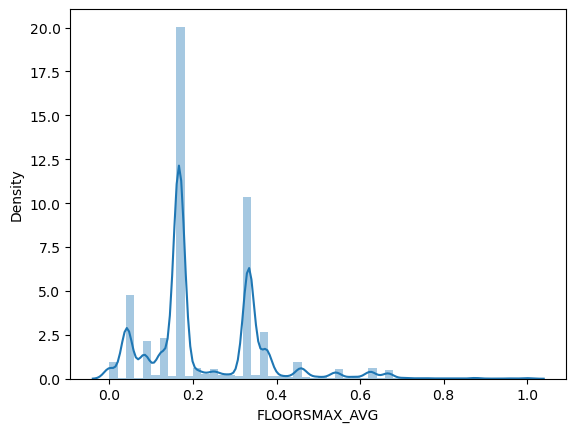

In [29]:
sns.distplot(applicants['FLOORSMAX_AVG']);

Checking the Execution

In [30]:
mode_val = applicants['FLOORSMAX_AVG'].mode()[0]
mode_val

0.1667

In [31]:
#imputting the mode for the missing values 
applicants['FLOORSMAX_AVG'].fillna(mode_val, inplace= True)

In [32]:
applicants['FLOORSMAX_AVG'].isnull().sum()

0

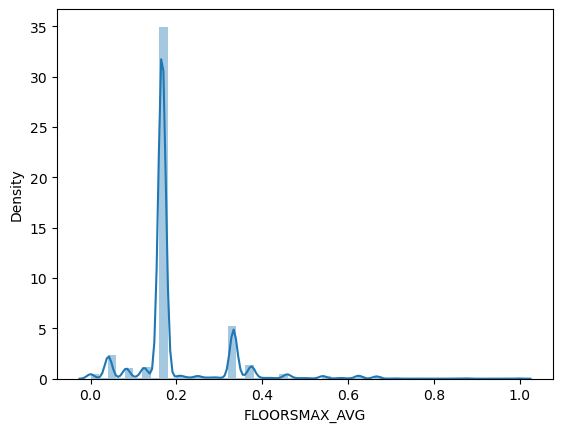

In [33]:
sns.distplot(applicants['FLOORSMAX_AVG']);

In [34]:
applicants['FLOORSMAX_MODE'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MODE, dtype: float64

In [35]:
applicants['FLOORSMAX_MODE'].mean()

0.2223150474784939

In [36]:
applicants['FLOORSMAX_MODE'].mode()

0    0.1667
Name: FLOORSMAX_MODE, dtype: float64

In [37]:
mode_val = applicants['FLOORSMAX_MODE'].mode()[0]
mode_val

0.1667

In [38]:
#imputting the mode for the missing values 
applicants['FLOORSMAX_MODE'].fillna(mode_val, inplace= True)

In [39]:
applicants['FLOORSMAX_MODE'].isnull().sum()

0

In [40]:
applicants['FLOORSMAX_MEDI'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MEDI, dtype: float64

In [41]:
applicants['FLOORSMAX_MEDI'].mean()

0.22589659009262678

In [42]:
applicants['FLOORSMAX_MEDI'].mode()

0    0.1667
Name: FLOORSMAX_MEDI, dtype: float64

In [43]:
mode_val = applicants['FLOORSMAX_MEDI'].mode()[0]
mode_val

0.1667

In [44]:
#imputting the mode for the missing values 
applicants['FLOORSMAX_MEDI'].fillna(mode_val, inplace= True)

In [45]:
applicants['FLOORSMAX_MEDI'].isnull().sum()

0

In [46]:
applicants["YEARS_BEGINEXPLUATATION_AVG"].mode()

0    0.9871
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [47]:
applicants["YEARS_BEGINEXPLUATATION_MODE"].mode()

0    0.9871
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [48]:
applicants["YEARS_BEGINEXPLUATATION_MEDI"].mode()

0    0.9871
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [49]:
mode_val = applicants['YEARS_BEGINEXPLUATATION_AVG'].mode()[0]
mode_val

0.9871

In [50]:
#imputting the mode for the missing values 
applicants['YEARS_BEGINEXPLUATATION_AVG'].fillna(mode_val, inplace= True)
applicants['YEARS_BEGINEXPLUATATION_MODE'].fillna(mode_val, inplace= True)
applicants['YEARS_BEGINEXPLUATATION_MEDI'].fillna(mode_val, inplace= True)

In [51]:
applicants['TOTALAREA_MODE'].head()

0    0.0149
1    0.0714
2       NaN
3       NaN
4       NaN
Name: TOTALAREA_MODE, dtype: float64

In [52]:
applicants['TOTALAREA_MODE'].mean()

0.10254666268544127

In [53]:
applicants['TOTALAREA_MODE'].mode()

0    0.0
Name: TOTALAREA_MODE, dtype: float64

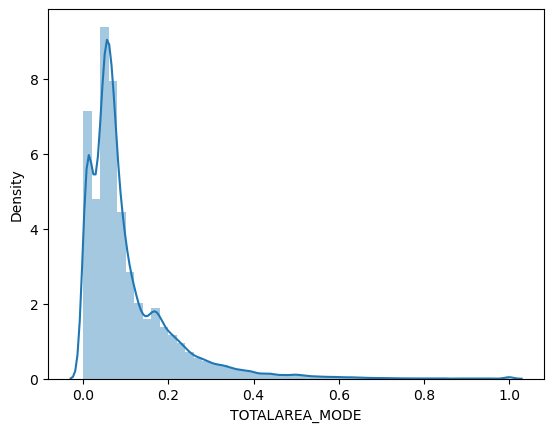

In [54]:
sns.distplot(applicants['TOTALAREA_MODE']);

In [55]:
# As we can see most of the values here are Zero so we can drop this column as it will be of no use 
applicants.drop("TOTALAREA_MODE",axis=1,inplace=True)

### Checking for the Categorical columns : We will be filling them by mean, median & mode

In [56]:
applicants['EMERGENCYSTATE_MODE'].head()

0     No
1     No
2    NaN
3    NaN
4    NaN
Name: EMERGENCYSTATE_MODE, dtype: object

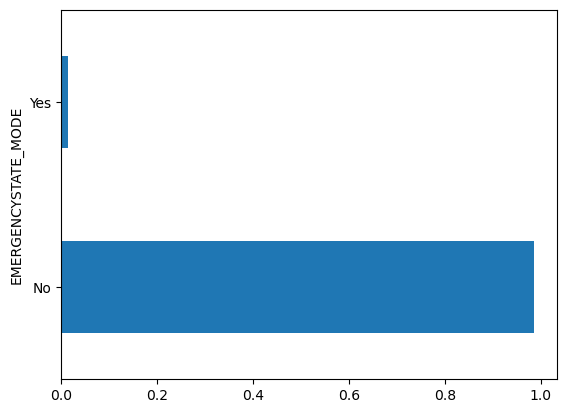

In [57]:
applicants['EMERGENCYSTATE_MODE'].value_counts(normalize= True).plot.barh()
plt.show()

As we can see there are mostly "No" for the response so we can fill in the attribute No in the missing values - 

In [58]:
Mode_val = applicants['EMERGENCYSTATE_MODE'].mode()[0]
Mode_val

'No'

In [59]:
applicants['EMERGENCYSTATE_MODE'].fillna(Mode_val, inplace= True)

In [60]:
#checking for execution 
applicants['EMERGENCYSTATE_MODE'].isnull().sum()

0

In [61]:
total_income = applicants.groupby("OCCUPATION_TYPE")["AMT_INCOME_TOTAL"].mean().sum()
total_income

3102408.426649684

In [62]:
unique_val = len(applicants['OCCUPATION_TYPE'].unique())
unique_val

19

In [63]:
Avg_income =  total_income/unique_val
Avg_income

163284.6540341939

In [64]:
applicants.groupby("OCCUPATION_TYPE")["AMT_INCOME_TOTAL"].mean()

OCCUPATION_TYPE
Accountants              194578.357842
Cleaning staff           130790.895551
Cooking staff            138396.508176
Core staff               172656.695254
Drivers                  187011.606413
HR staff                 188916.282416
High skill tech staff    182842.045683
IT staff                 213465.601711
Laborers                 166357.482525
Low-skill Laborers       133228.001911
Managers                 260336.681717
Medicine staff           149709.643434
Private service staff    182334.812783
Realty agents            195003.994674
Sales staff              152302.874710
Secretaries              160541.662069
Security staff           149662.695953
Waiters/barmen staff     144272.583828
Name: AMT_INCOME_TOTAL, dtype: float64

As we can see "AMT_INCOME_TOTAL" of the "Laborers" is nearest to the "Avg_income" so we can impute the labourers in the missing value column. 

In [65]:
applicants['OCCUPATION_TYPE'].fillna("Laborers", inplace= True)

In [66]:
applicants['OCCUPATION_TYPE'].isnull().sum()

0

In [67]:
applicants["EXT_SOURCE_3"].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

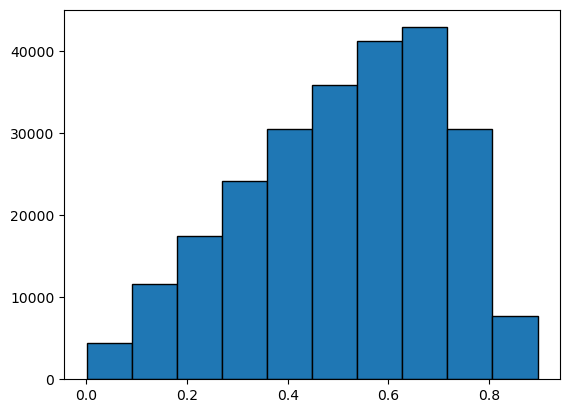

In [68]:
# Plotting the distribution
plt.hist(applicants["EXT_SOURCE_3"] , edgecolor = "black")
plt.show()

In [69]:
mean_val = applicants['EXT_SOURCE_3'].mean()

In [70]:
applicants['EXT_SOURCE_3'].mode()

0    0.7463
Name: EXT_SOURCE_3, dtype: float64

In [71]:
#This data is a skewed normal distribution so will fill the data with mean.
applicants['EXT_SOURCE_3'].fillna(mean_val, inplace= True)

In [72]:
applicants['EXT_SOURCE_3'].isnull().sum()

0

In [73]:
#This data is a skewed normal distribution so will fill the data with mean.
applicants['EXT_SOURCE_2'].fillna(mean_val, inplace= True)

In [74]:
applicants['EXT_SOURCE_2'].isnull().sum()

0

In [75]:
applicants['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<Axes: ylabel='Frequency'>

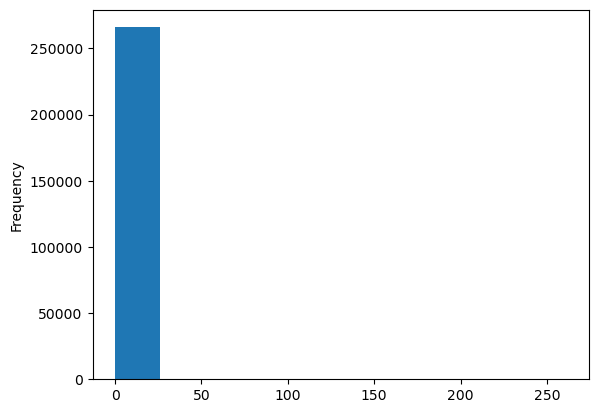

In [76]:
applicants['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist()

In [77]:
applicants.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [78]:
applicants['AMT_REQ_CREDIT_BUREAU_QRT'].mean()

0.26547414959848414

In [79]:
applicants['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [80]:
applicants['AMT_REQ_CREDIT_BUREAU_QRT'] = applicants['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(applicants['AMT_REQ_CREDIT_BUREAU_QRT'].mode().iloc[0])

In [81]:
applicants['AMT_REQ_CREDIT_BUREAU_QRT'].isna().sum()

0

<Axes: ylabel='Frequency'>

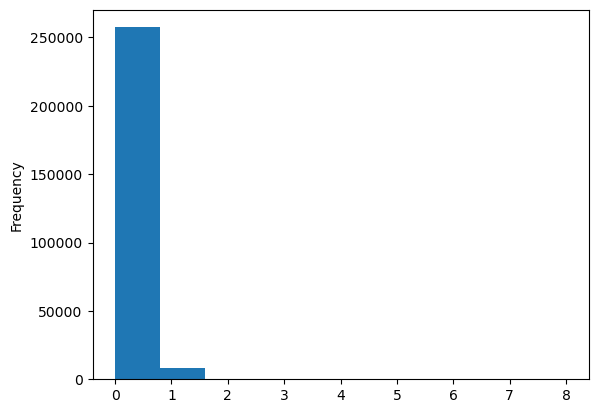

In [82]:
num_unique_values =  len(applicants.AMT_REQ_CREDIT_BUREAU_WEEK.unique())
applicants['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins = num_unique_values)

In [83]:
applicants.drop("AMT_REQ_CREDIT_BUREAU_WEEK",axis=1,inplace=True)

<Axes: ylabel='Frequency'>

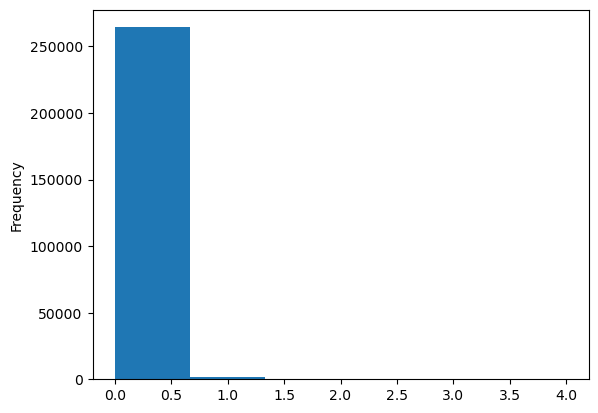

In [84]:
num_unique_values =  len(applicants.AMT_REQ_CREDIT_BUREAU_HOUR.unique())
applicants['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins = num_unique_values)

In [85]:
applicants.drop("AMT_REQ_CREDIT_BUREAU_HOUR",axis=1,inplace=True)

In [86]:
applicants.drop("AMT_REQ_CREDIT_BUREAU_DAY",axis=1,inplace=True)
applicants.drop("AMT_REQ_CREDIT_BUREAU_MON",axis=1,inplace=True)
applicants.drop("AMT_REQ_CREDIT_BUREAU_YEAR",axis=1,inplace=True)

So, as we can see these are some similar columns which have no use in the analysis so will drop them.

In [87]:
# We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'NAME_TYPE_SUITE']

applicants.drop(labels=unwanted,axis=1,inplace=True)

There are some columns where the value is mentioned as 'XNA' which probably means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

Let's find these categorical columns having these 'XNA' values


In [88]:
# For Gender column
applicants["CODE_GENDER"].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

In [89]:
# Updating the columns in 'CODE_GENDER'== "XNA" with "F" for the dataset

applicants.loc[applicants['CODE_GENDER']=='XNA','CODE_GENDER']='F'
applicants['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [90]:
# Describing the organization type column

applicants['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [91]:
applicants['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% values of the column are XNA. Hence if we drop these , it will not have any major impact on our dataset.

In [92]:
# Hence, dropping the rows where we have 'XNA' values in the organization type column

applicants=applicants.drop(applicants.loc[applicants['ORGANIZATION_TYPE']=='XNA'].index)
applicants[applicants['ORGANIZATION_TYPE']=='XNA'].shape

(0, 44)

## Treating on the remaining columns of with null values 

In [93]:
applicants['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    251288.000000
mean          0.097661
std           0.358146
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [94]:
applicants['DEF_60_CNT_SOCIAL_CIRCLE'].isna().sum()

849

In [95]:
applicants['DEF_60_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  0.,  1., nan,  3.,  5.,  4., 24.,  6.])

In [96]:
applicants['DEF_60_CNT_SOCIAL_CIRCLE'].mean()

0.09766085129413263

In [97]:
applicants['DEF_60_CNT_SOCIAL_CIRCLE'].median()

0.0

In [98]:
applicants['DEF_60_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: ylabel='Frequency'>

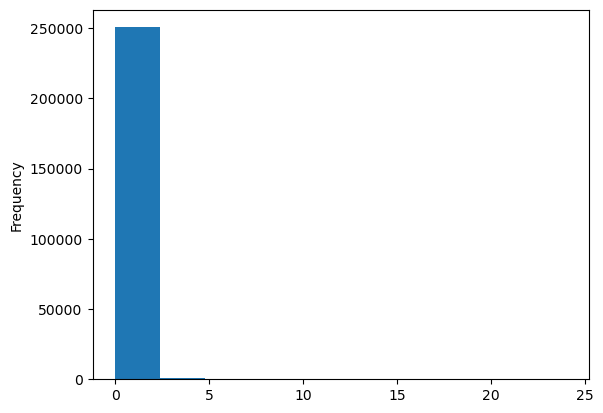

In [99]:
applicants['DEF_60_CNT_SOCIAL_CIRCLE'].plot.hist()

In [100]:
applicants['DEF_60_CNT_SOCIAL_CIRCLE']=applicants['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(applicants['DEF_60_CNT_SOCIAL_CIRCLE'].mode().iloc[0])

In [101]:
#similar approach for the rest of the coloums of Def.
applicants['OBS_30_CNT_SOCIAL_CIRCLE']=applicants['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(applicants['OBS_30_CNT_SOCIAL_CIRCLE'].mode().iloc[0])
applicants['DEF_30_CNT_SOCIAL_CIRCLE']=applicants['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(applicants['DEF_30_CNT_SOCIAL_CIRCLE'].mode().iloc[0])
applicants['OBS_60_CNT_SOCIAL_CIRCLE']=applicants['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(applicants['OBS_60_CNT_SOCIAL_CIRCLE'].mode().iloc[0])

AMT_ANNUITY - Column As we can see the 'AMT_ANNUITY' column is having few null rows, we can immpute the values in this column.

<Axes: >

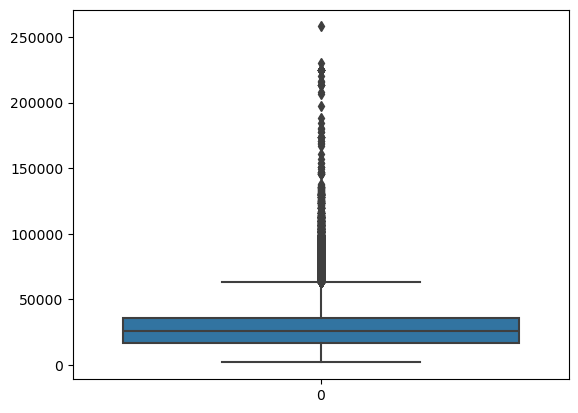

In [102]:
#seeing the outliers
sns.boxplot(applicants["AMT_ANNUITY"])

Since 'AMT_ANNUITY' column have very large outliers it will be inappropriate to fill those missing values with mean.Hence, Median will be the best method to apply here.

In [103]:
applicants["AMT_ANNUITY"].fillna(applicants["AMT_ANNUITY"].median(),inplace=True)

In [104]:
#checking if the task is executed or not
applicants["AMT_ANNUITY"].isnull().sum()

0

<Axes: >

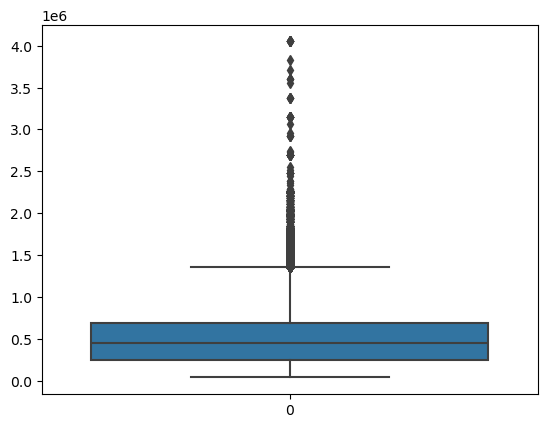

In [105]:
#seeing the outliers
sns.boxplot(applicants["AMT_GOODS_PRICE"])

In [106]:
applicants["AMT_GOODS_PRICE"].fillna(applicants["AMT_GOODS_PRICE"].median(),inplace=True)

In [107]:
applicants["AMT_ANNUITY"].isnull().sum()

0

In [108]:
applicants.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OCCUPATION_TYPE                 0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_T

## The Data is cleaned and ready for analysis

#### Derived Metrics
Creating bins for continous variable columns 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [109]:
# Creating bins for AMT_INCOME_TOTAL

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

applicants['AMT_INCOME_RANGE']=pd.cut(applicants['AMT_INCOME_TOTAL'],bins,labels=slot)

In [110]:
# Creating bins for AMT_CREDIT

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

applicants['AMT_CREDIT_RANGE']=pd.cut(applicants['AMT_CREDIT'],bins=bins,labels=slots)

## TARGET

In [111]:
applicants["TARGET"].unique()

array([1, 0], dtype=int64)

In [112]:
applicants['TARGET'].isna().sum()

0

In [113]:
# Dividing the dataset into two datasets of  train1 which is "client with payment difficulties" and train0 is "all other"

train_0 = applicants.loc[applicants['TARGET'] == 0]
train_1 = applicants.loc[applicants['TARGET'] == 1]

Calculating Imbalance percentage

In [114]:
len(train_0)

230302

In [115]:
len(train_1)

21835

In [116]:
# Since the majority is train0 and minority is train1 will give us the imbalance percentage

ratio_imbalance = round(len(train_0)/len(train_1),2)
print("The Imbalance ratio is:", ratio_imbalance)

The Imbalance ratio is: 10.55


Now, we will analyse numerical and categorical data. Let's start with categorical data.

In [117]:
# Categorical columns are:
cat_col = list(set(applicants.columns) - set(applicants.describe().columns)) 
cat_col

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'EMERGENCYSTATE_MODE',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'AMT_INCOME_RANGE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'AMT_CREDIT_RANGE']

In [118]:
# Numerical columns are:
num_col = applicants.describe().columns
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')

Here, we have used 3 different plots for analysis
- Pie plot: For plotting the all the values present in a column in terms of percentage. So, the sum of those data types will be 100. 
- Countplot 1: Here, plotted the count of the different categories. So, Target=0 will have higher count than Target=1. 
- Countplot 2: To plot this dataset, we have first divided the dataset into 2 subsets, Target=0 and Target=1. Then again divided the individual Target=0 and Target=1 into different categories. Then, plotted these categories in terms of percentage. So, you can find that the values for Target=0 and Target=1 are mostly equal. Please go through the code of this plot to understand for further doubts. 

In [119]:
applicants["TARGET"] = applicants["TARGET"].apply(str)

In [120]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(11,9))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = "TARGET", data = train, ax=ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

In [121]:
train_categorical = applicants.select_dtypes(include=['object']).columns
train_categorical

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

# Univariate Analysis of the Categorical data

### Plotting the data for categorical columns

Plotting  TARGET


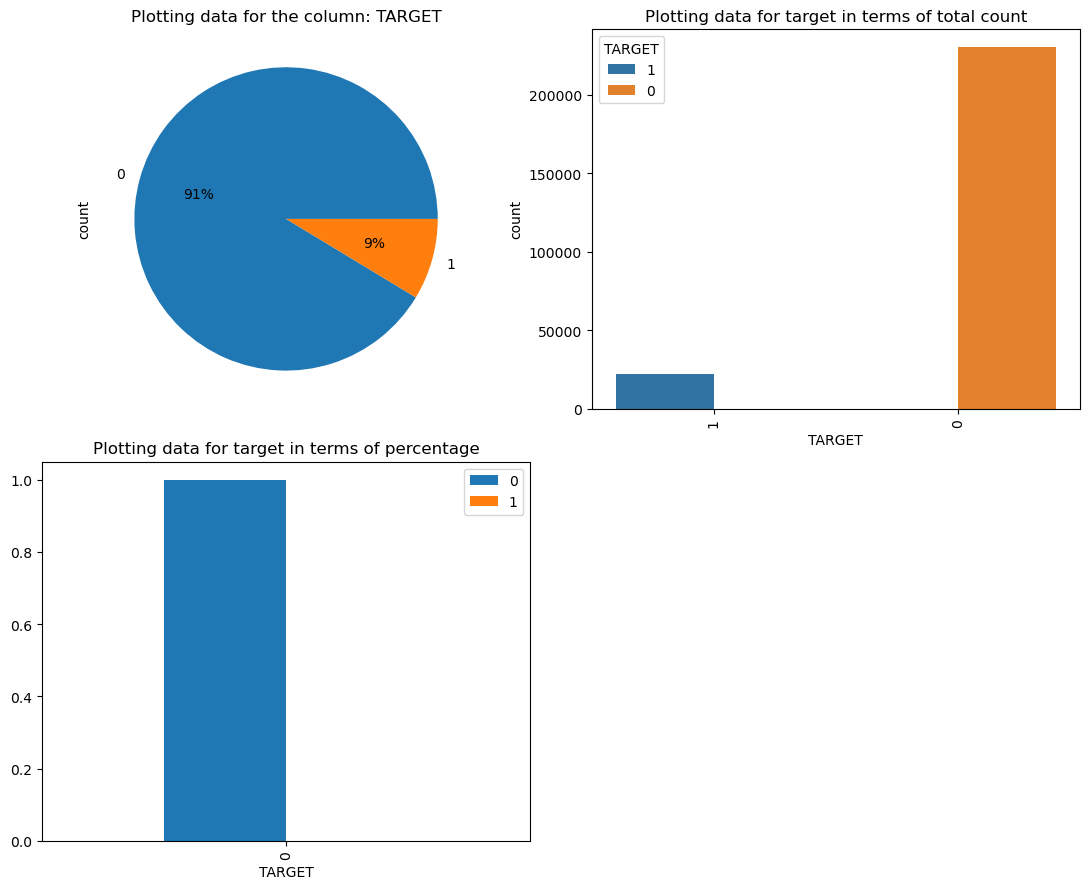

----------------------------------------------------------------------------------------------
Plotting  NAME_CONTRACT_TYPE


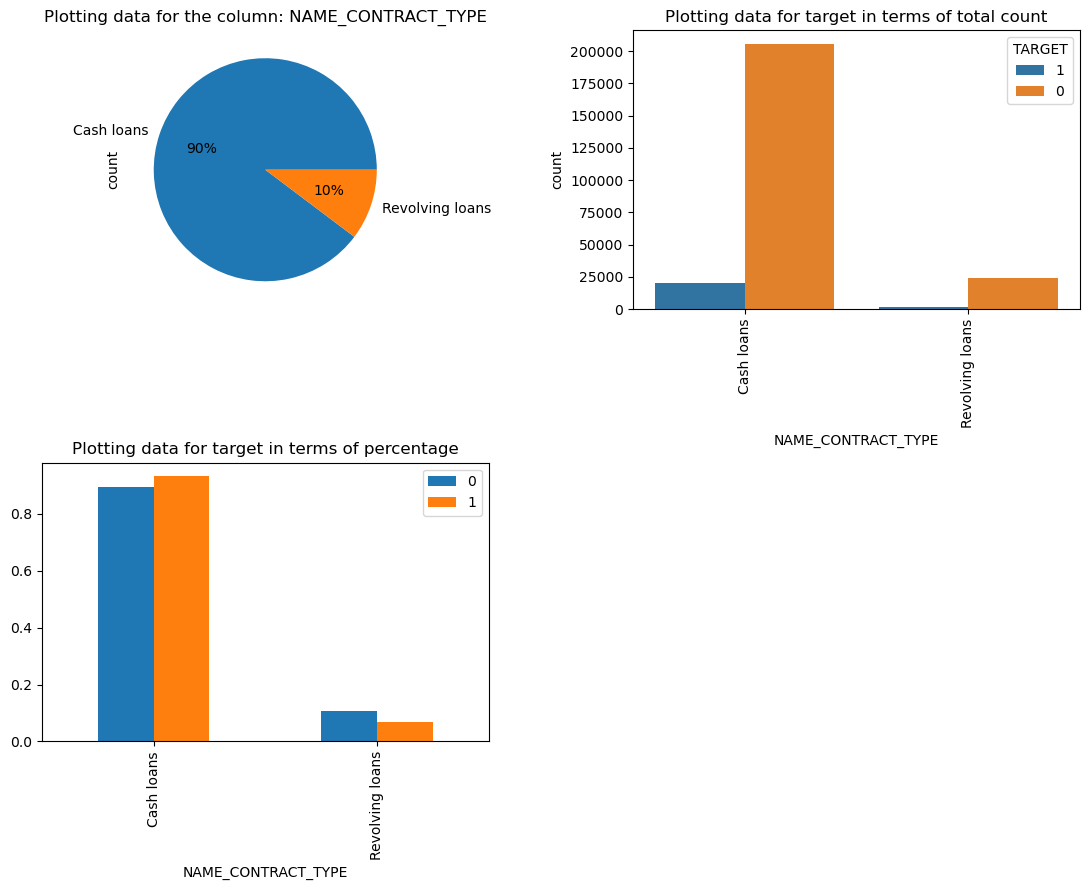

----------------------------------------------------------------------------------------------
Plotting  CODE_GENDER


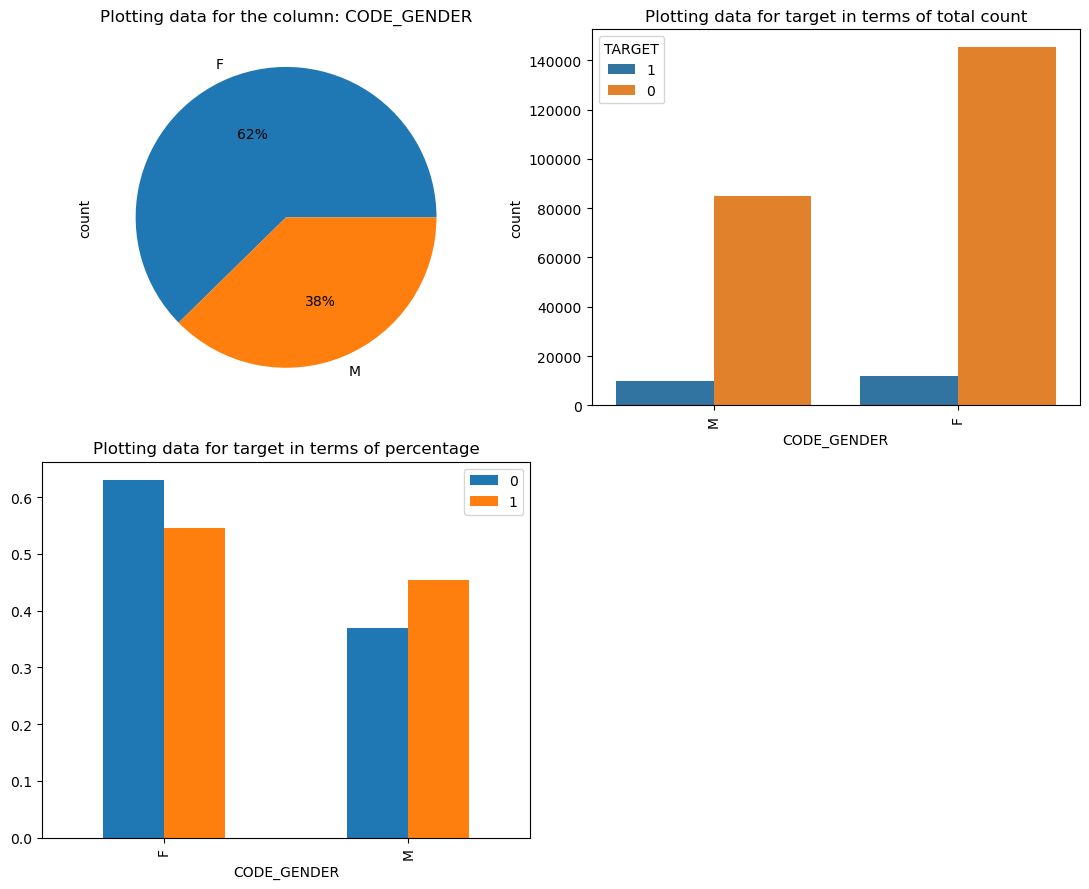

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_CAR


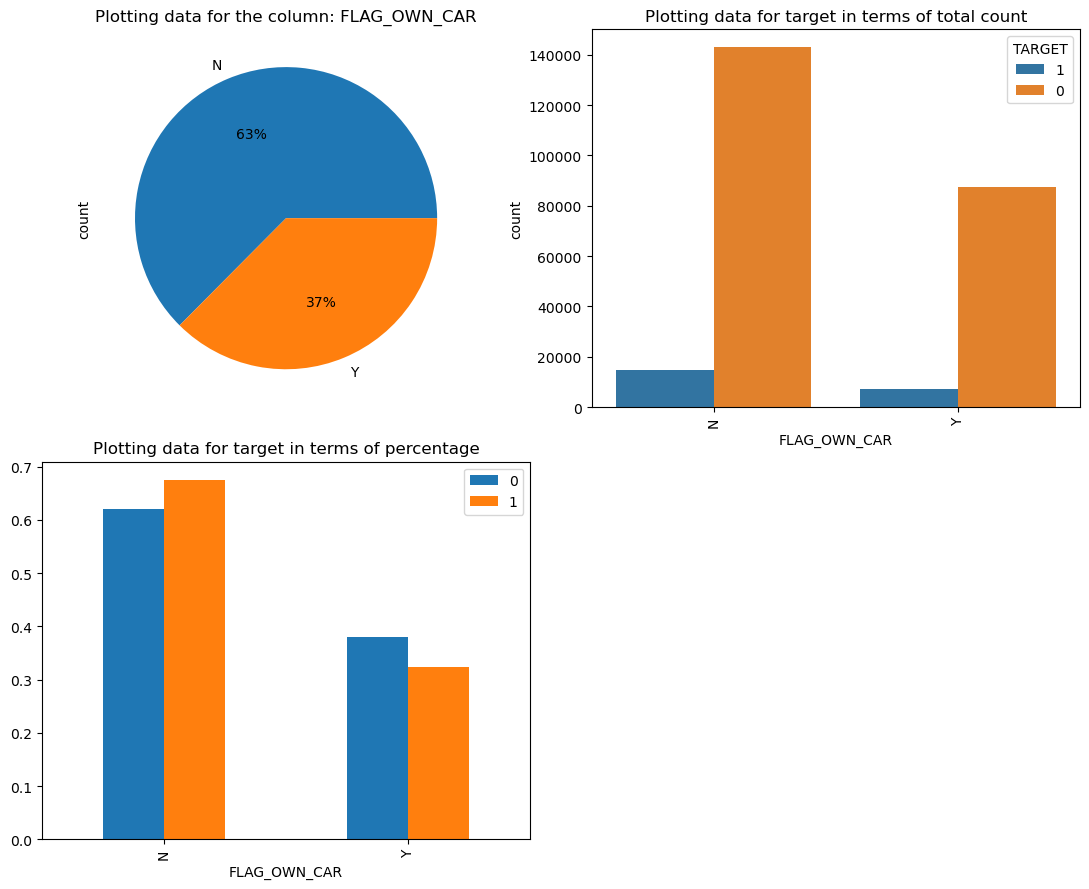

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_REALTY


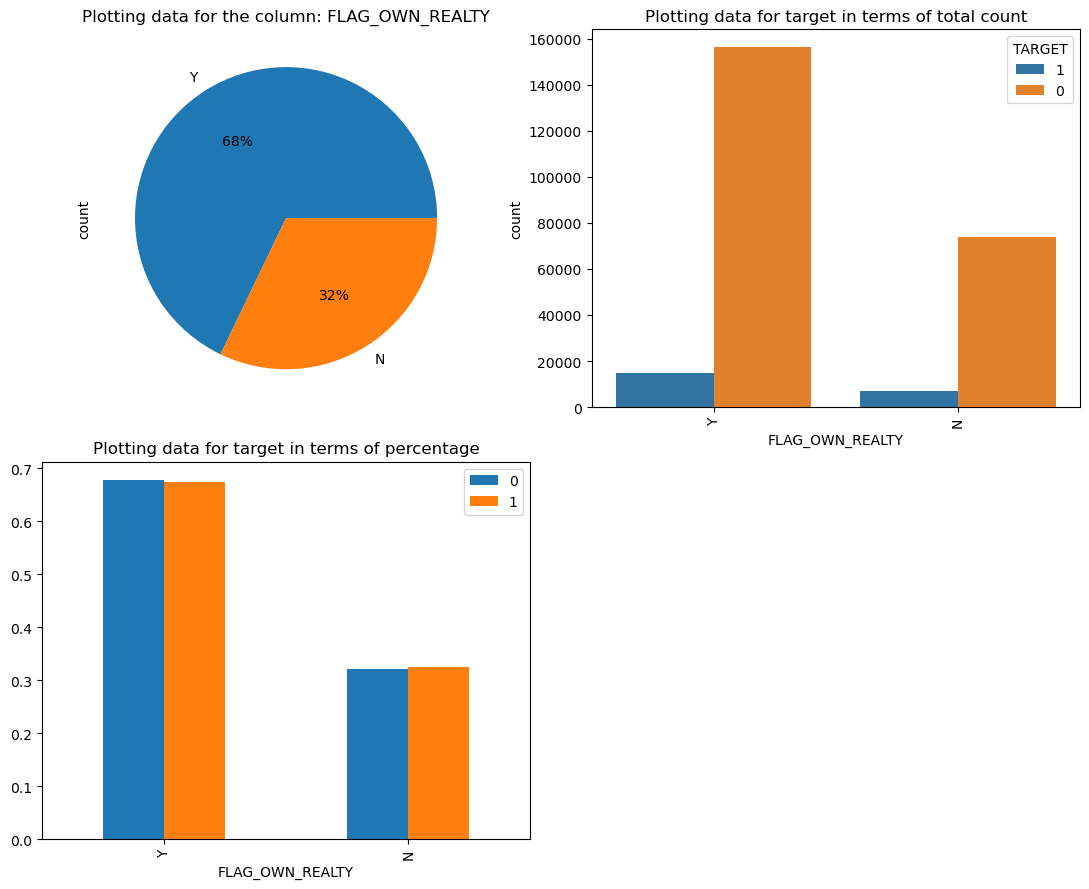

----------------------------------------------------------------------------------------------
Plotting  NAME_INCOME_TYPE


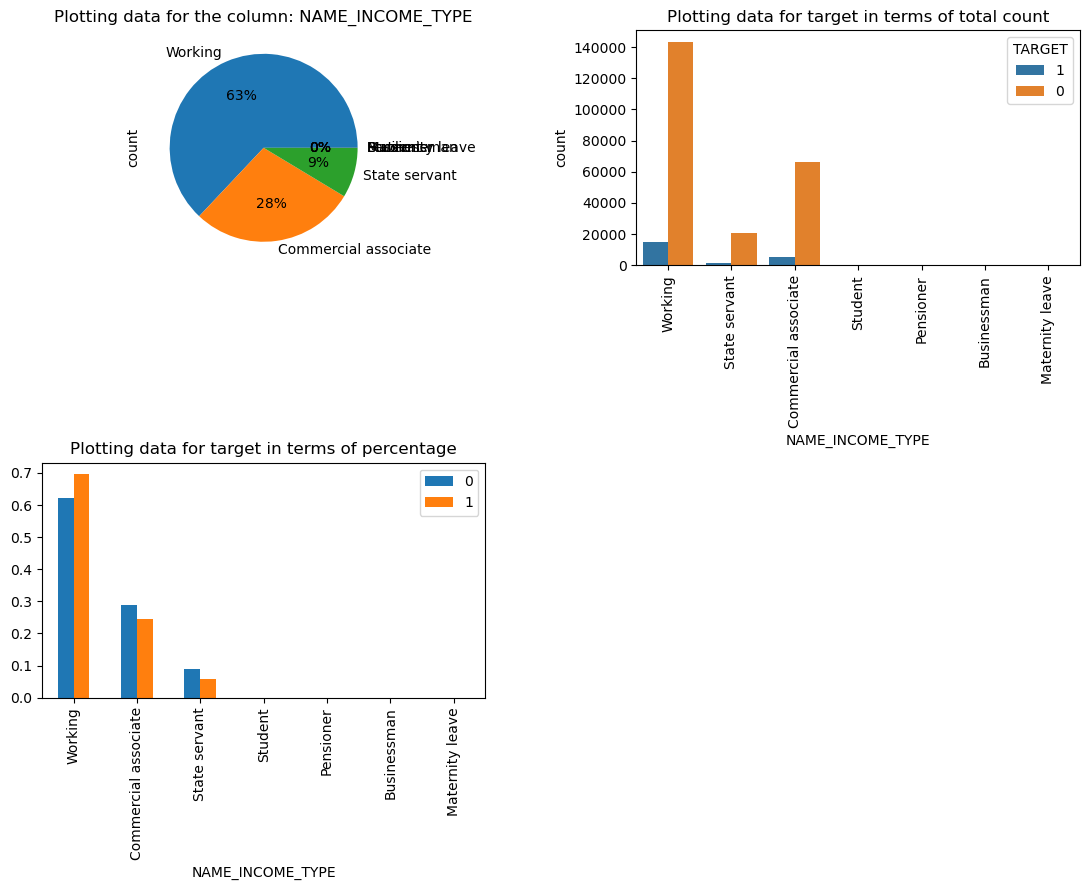

----------------------------------------------------------------------------------------------
Plotting  NAME_EDUCATION_TYPE


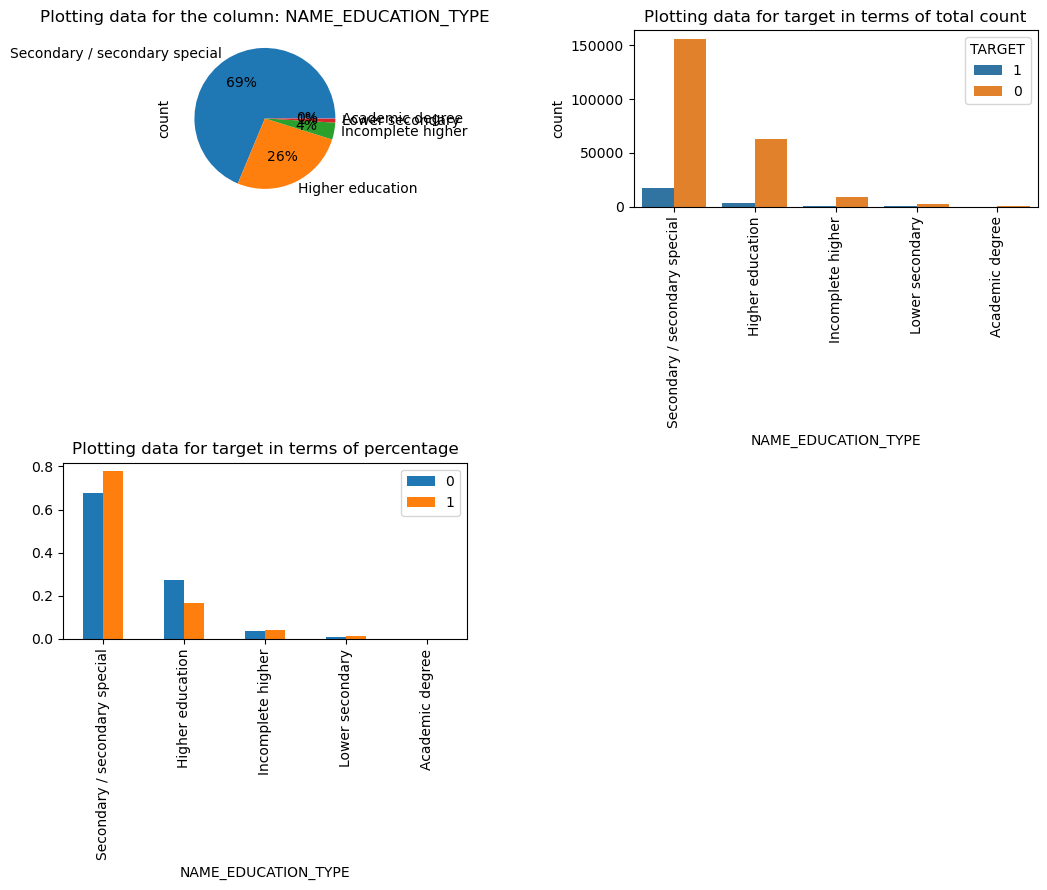

----------------------------------------------------------------------------------------------
Plotting  NAME_FAMILY_STATUS


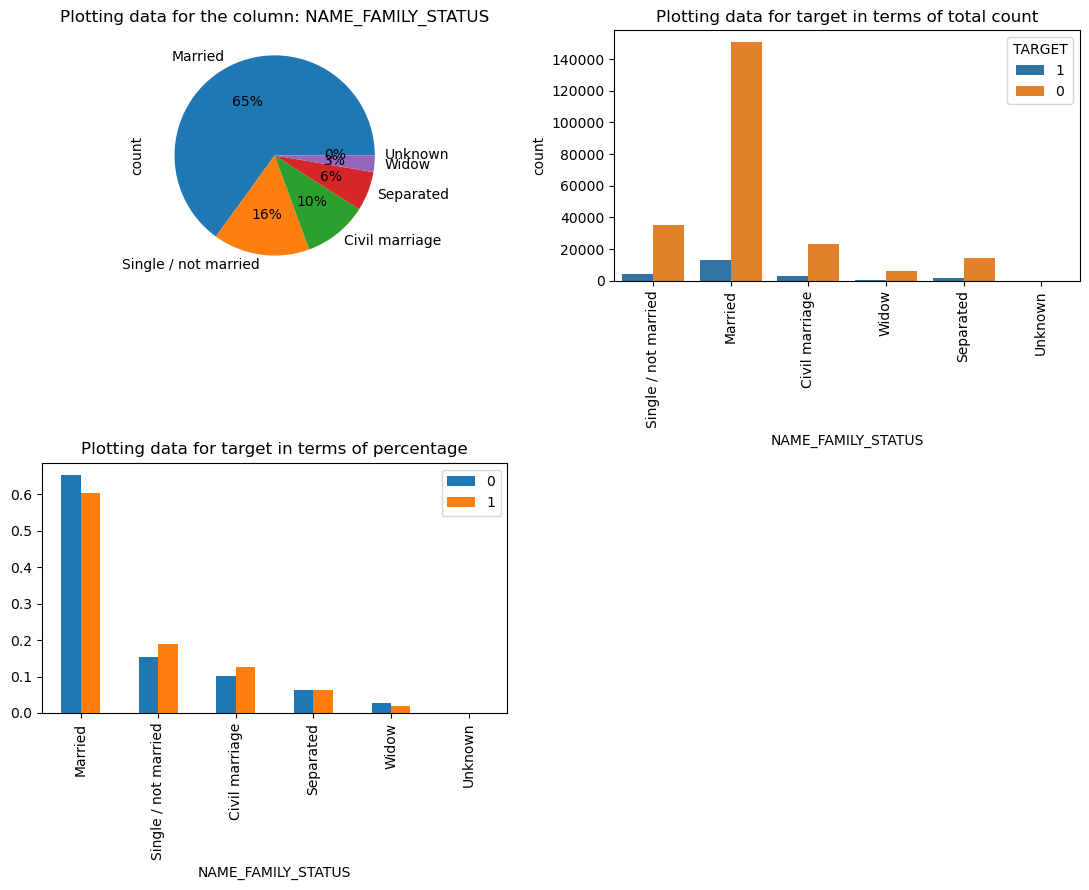

----------------------------------------------------------------------------------------------
Plotting  NAME_HOUSING_TYPE


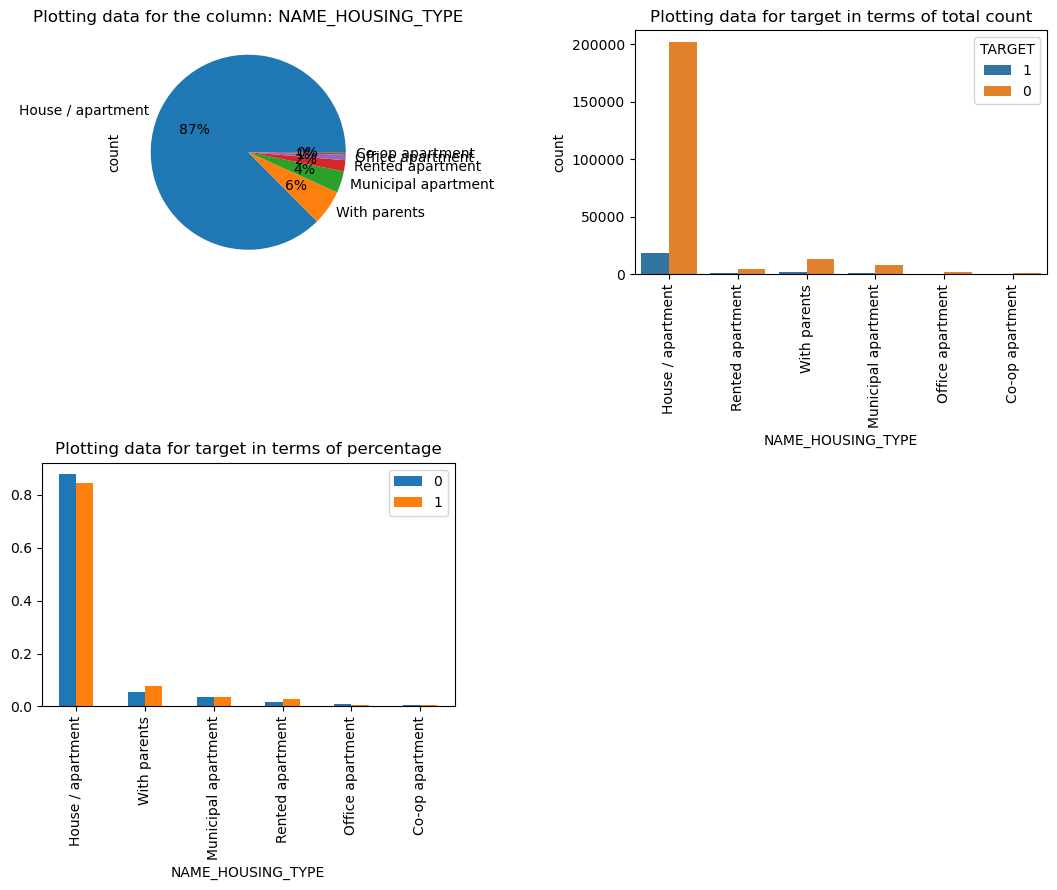

----------------------------------------------------------------------------------------------
Plotting  OCCUPATION_TYPE


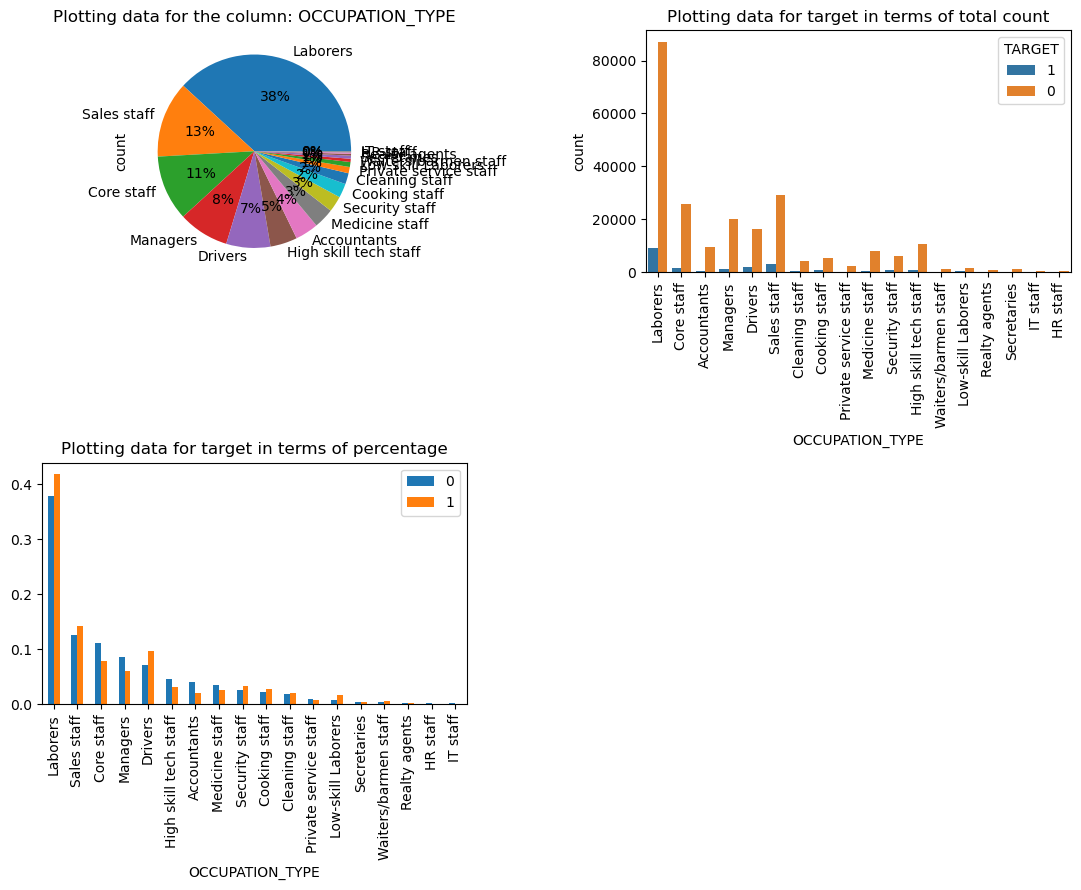

----------------------------------------------------------------------------------------------
Plotting  WEEKDAY_APPR_PROCESS_START


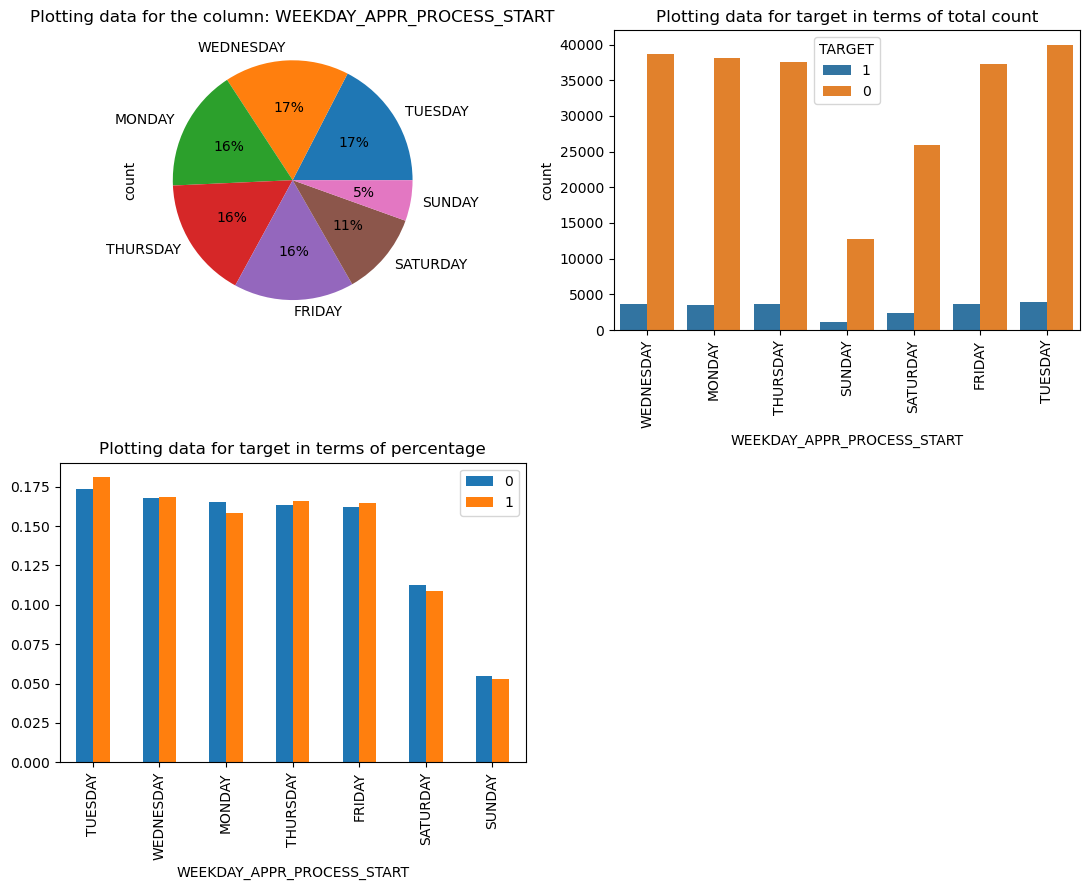

----------------------------------------------------------------------------------------------
Plotting  ORGANIZATION_TYPE


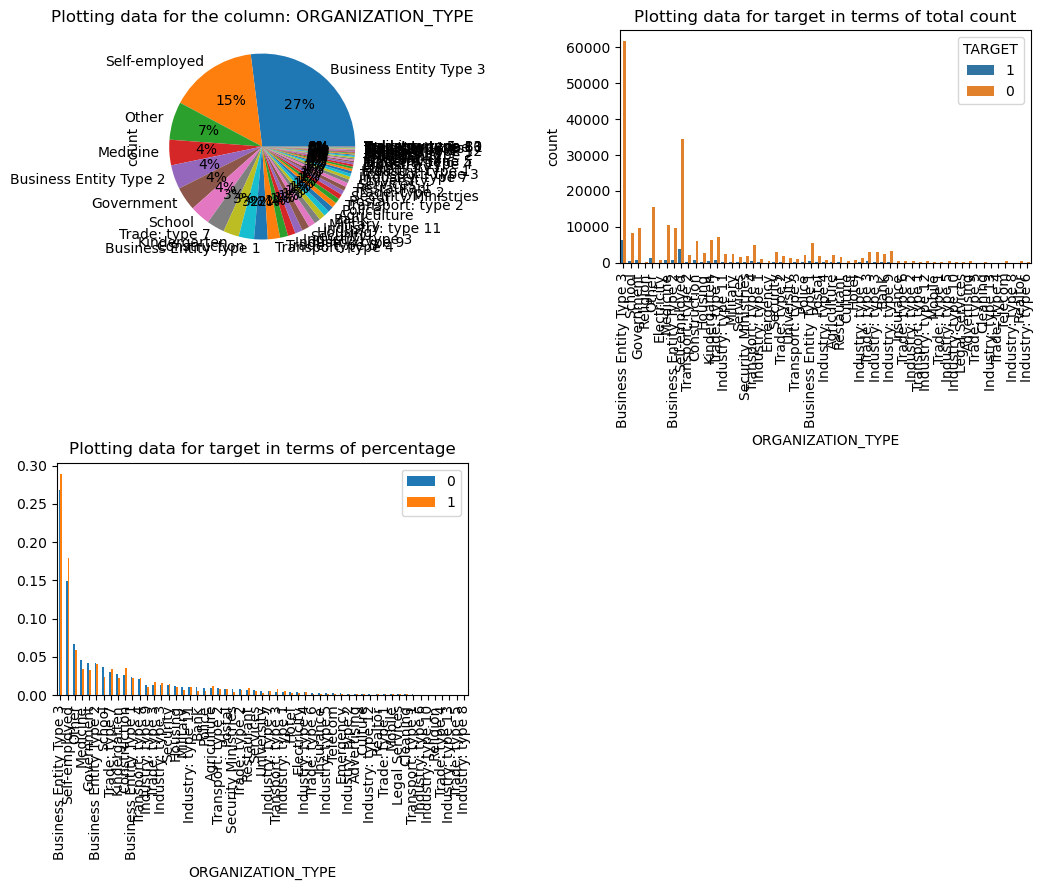

----------------------------------------------------------------------------------------------
Plotting  EMERGENCYSTATE_MODE


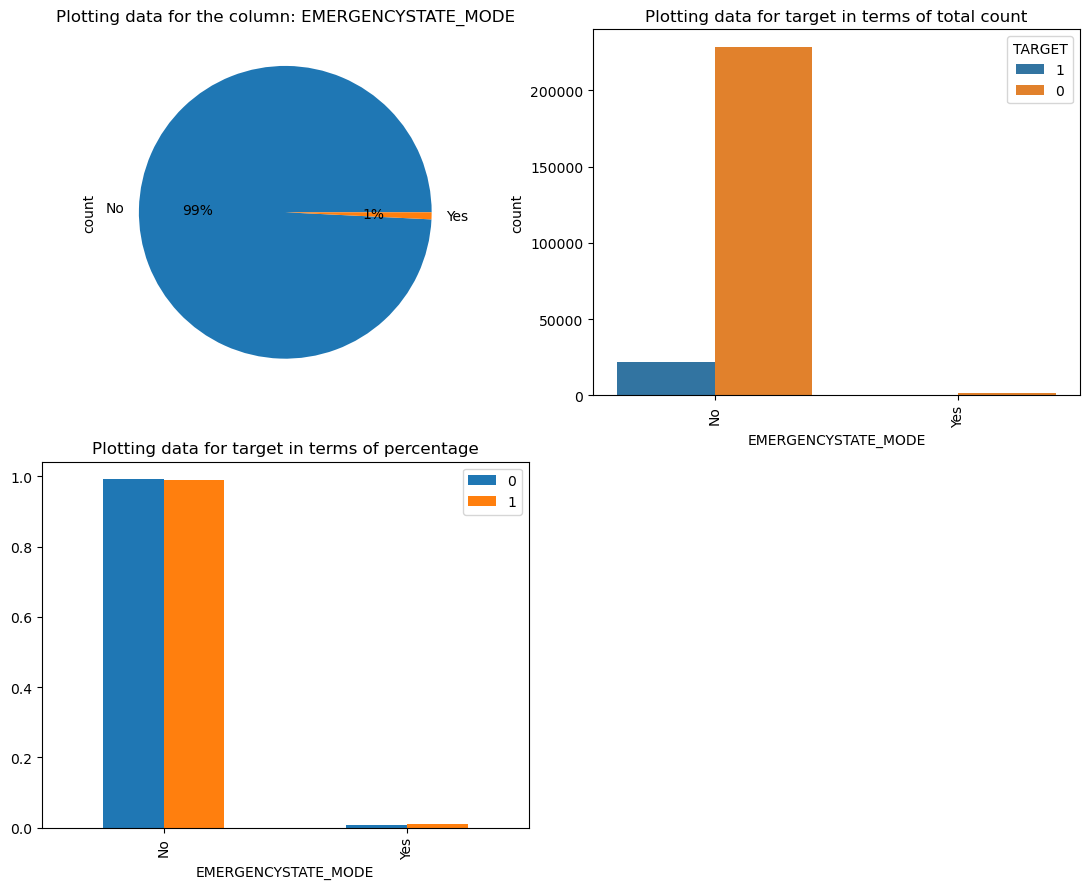

----------------------------------------------------------------------------------------------


In [122]:
for column in train_categorical:
    print("Plotting ", column)
    plotting(applicants, train_0, train_1, column)
    print('----------------------------------------------------------------------------------------------')

### Meaningfull Insights from the plots of categorical data - Few notable points


#### Analysis through Income Distribution for Train0 & Train1

- #### Train 1 = clients with no payment difficulties

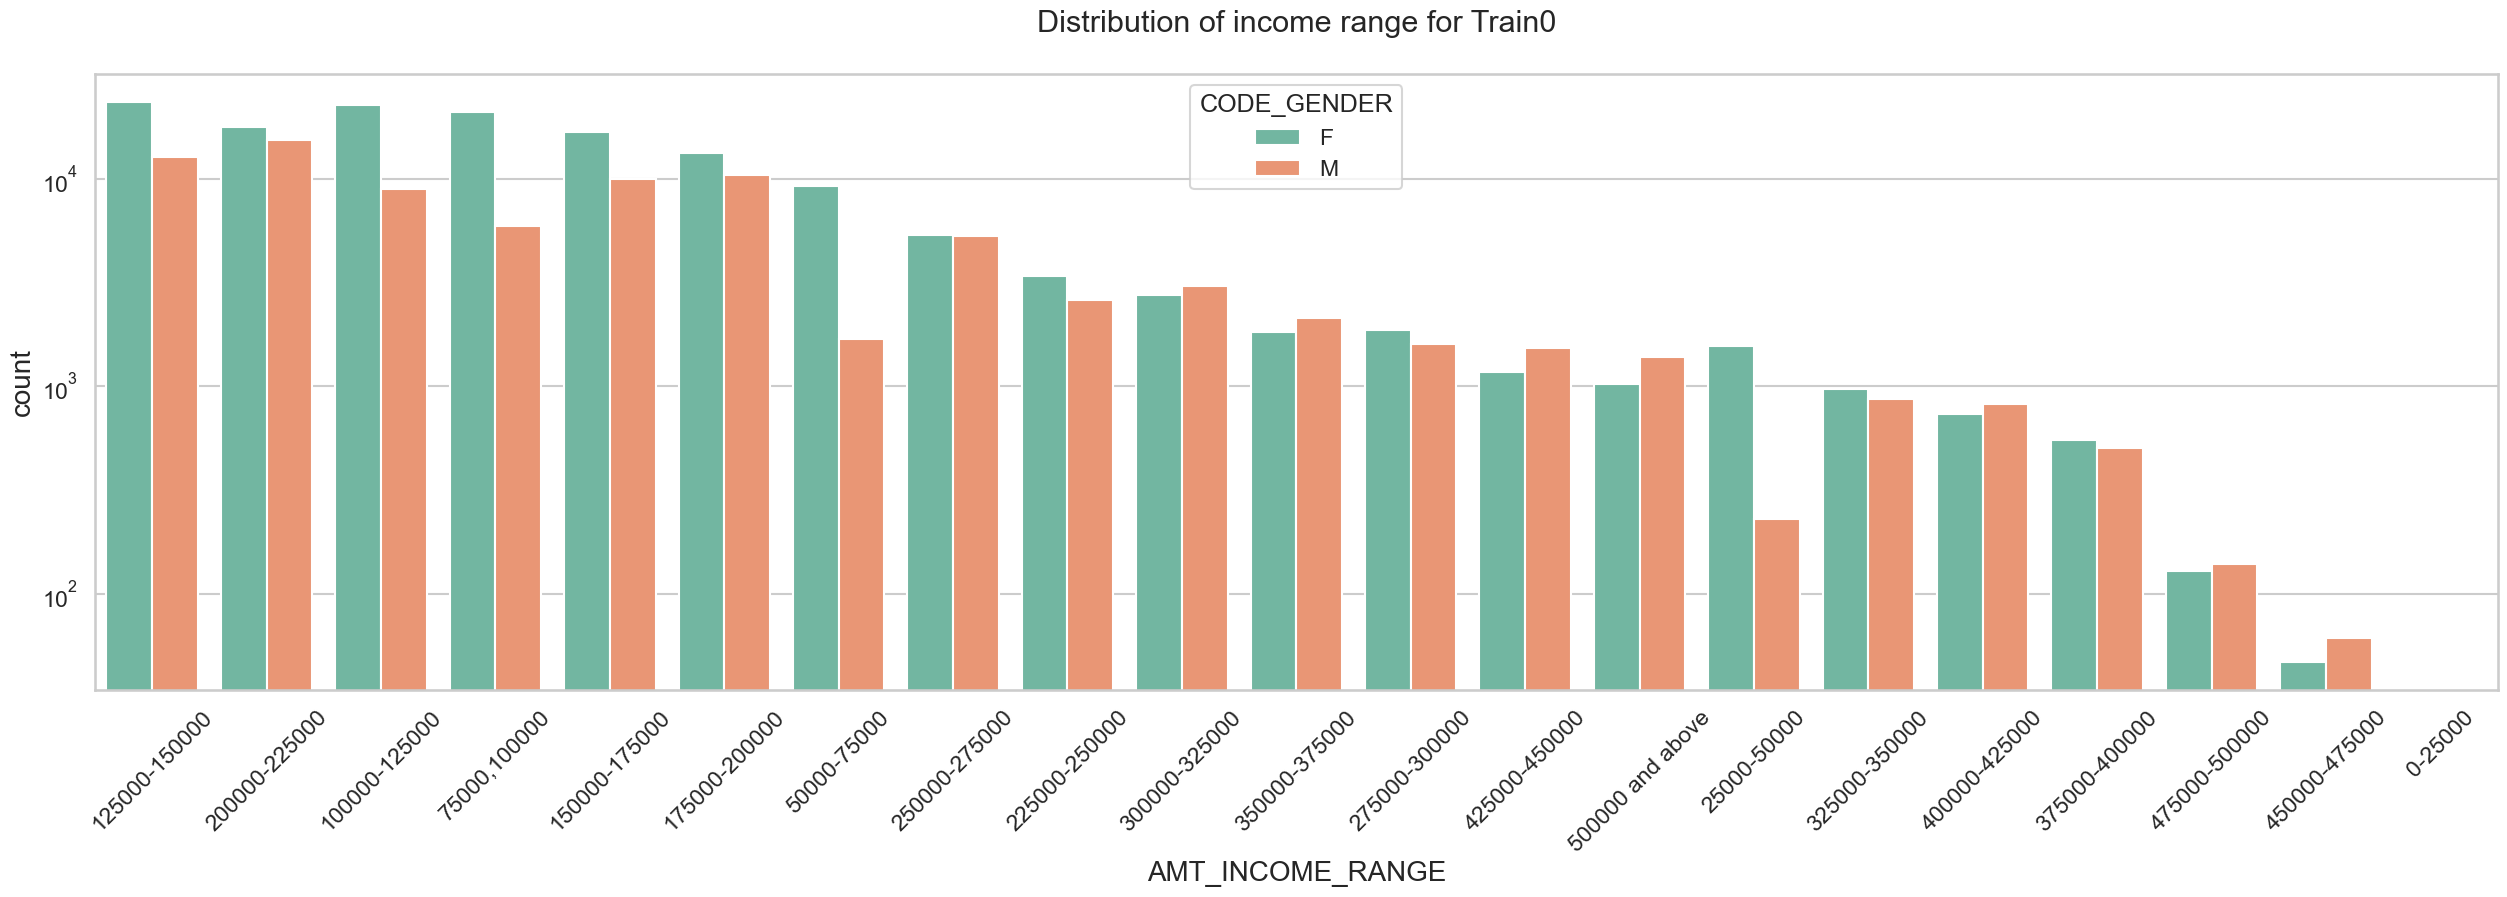

In [123]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

temp = pd.Series(data = 'CODE_GENDER')
fig, ax = plt.subplots()
width = len(applicants['AMT_INCOME_RANGE'].unique()) + 7 + 4*len(temp.unique())
fig.set_size_inches(width , 8)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Distribution of income range for Train0")

ax = sns.countplot(data = train_0, x= 'AMT_INCOME_RANGE', order=applicants['AMT_INCOME_RANGE'].value_counts().index,hue = 'CODE_GENDER',palette='Set2') 
plt.show()

As we can see from our previous analysis and this graph that the -

- Female counts are much higher than male.
- This graph show that females are more than male in having credits for that range.
- Very less count for income range 400000 and above.

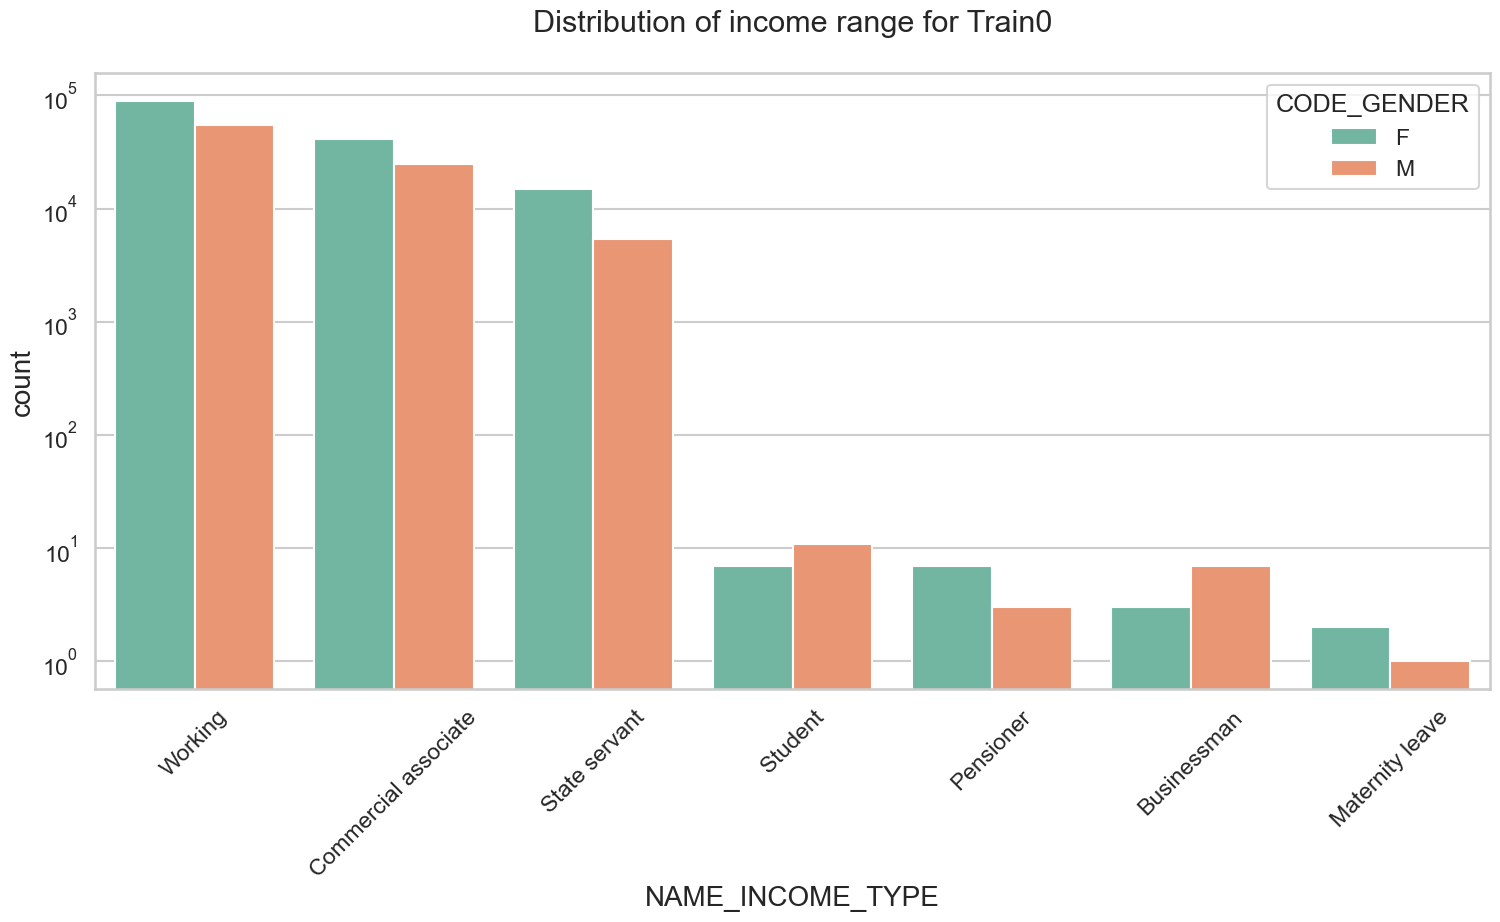

In [124]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

temp = pd.Series(data = 'CODE_GENDER')
fig, ax = plt.subplots()
width = len(applicants['NAME_INCOME_TYPE'].unique()) + 7 + 4*len(temp.unique())
fig.set_size_inches(width , 8)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Distribution of income range for Train0")

ax = sns.countplot(data = train_0, x= 'NAME_INCOME_TYPE', order=applicants['NAME_INCOME_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='Set2') 
plt.show()

Observations for the Income Type - 

- Student and businessman have are higher in percentage of loan repayment.
- Working, State servent and Commercial associates are higher in default percentage.
- For this Females are having more number of credits than male.
- Maternity category is significantly higher problem in repayment.

- #### Train 1 = clients with no payment difficulties

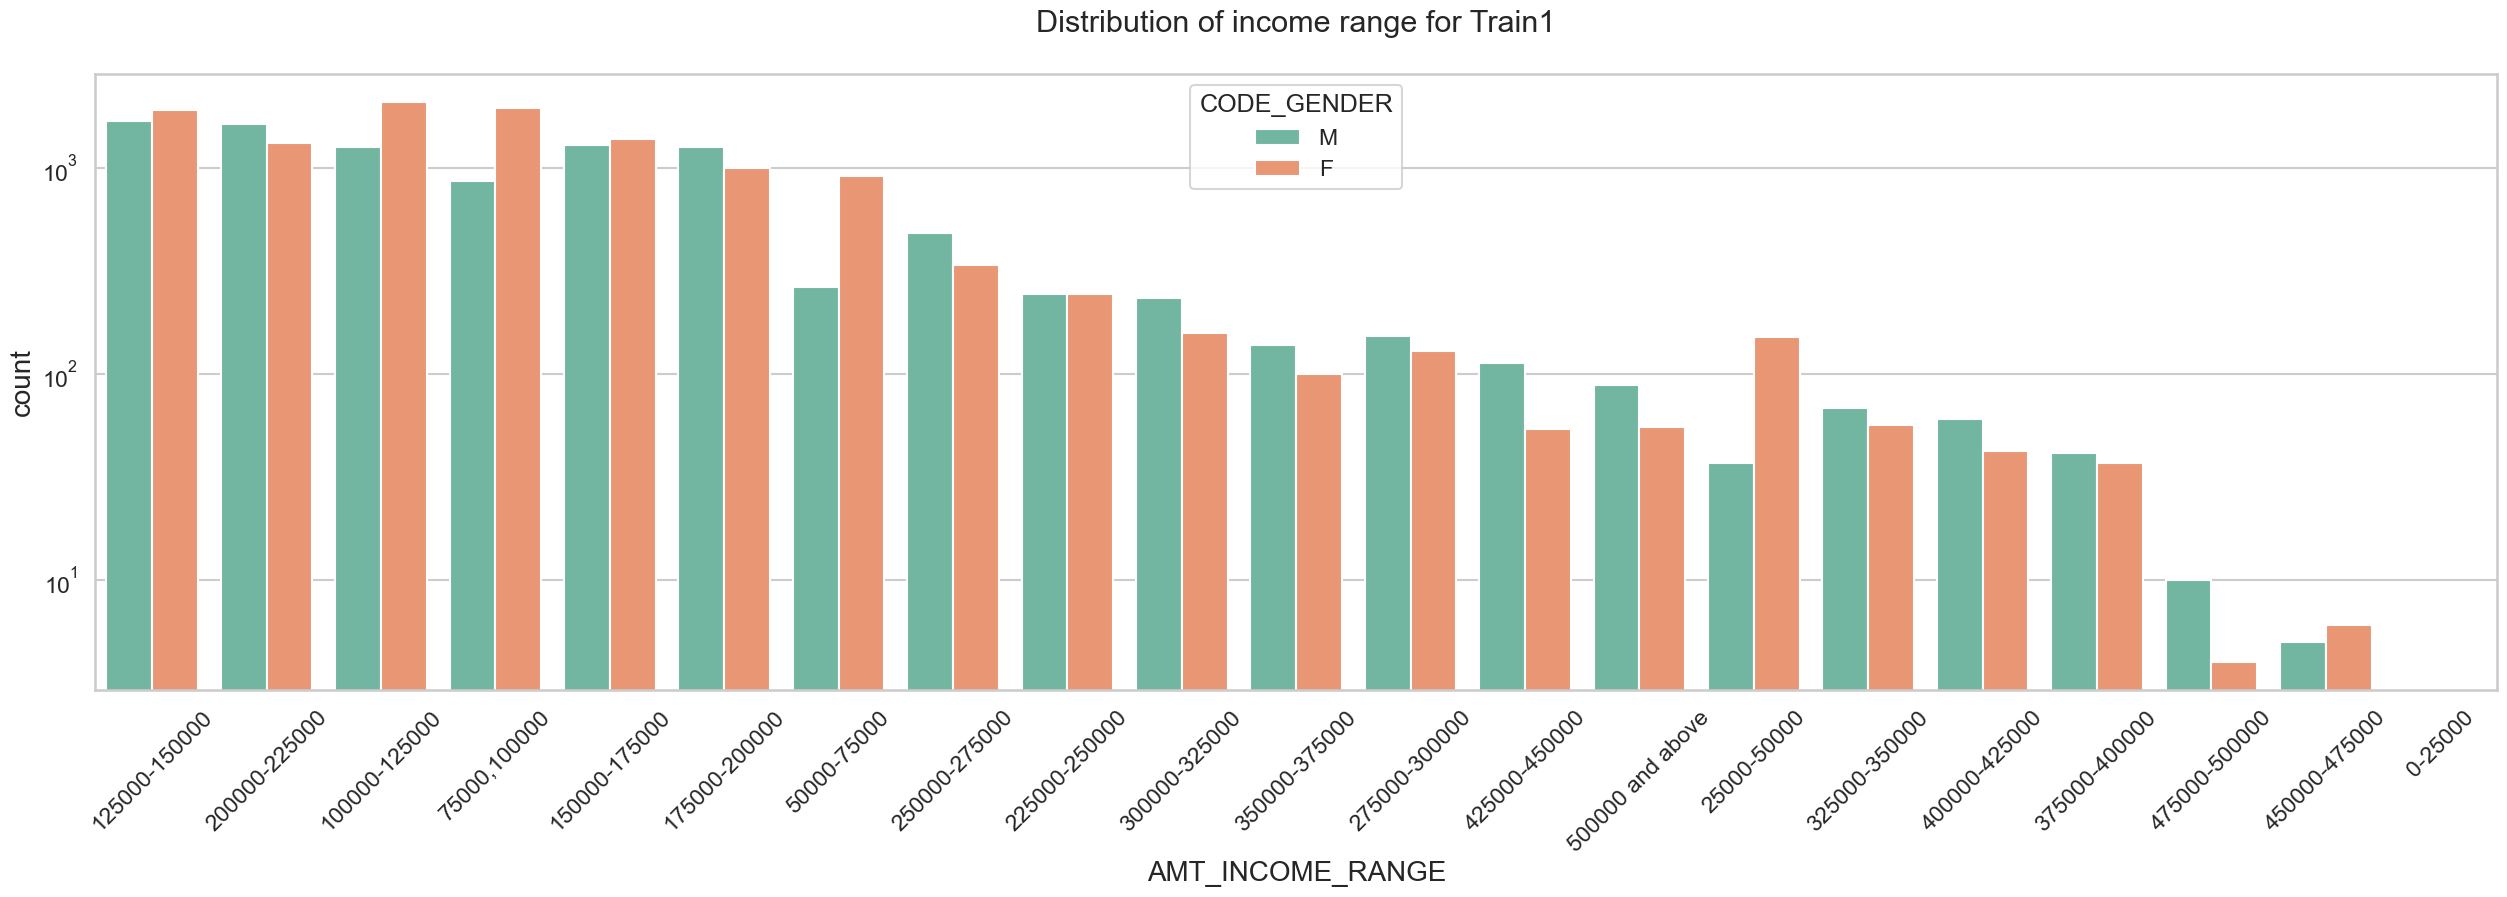

In [125]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

temp = pd.Series(data = 'CODE_GENDER')
fig, ax = plt.subplots()
width = len(applicants['AMT_INCOME_RANGE'].unique()) + 7 + 4*len(temp.unique())
fig.set_size_inches(width , 8)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Distribution of income range for Train1")

ax = sns.countplot(data = train_1, x= 'AMT_INCOME_RANGE', order=applicants['AMT_INCOME_RANGE'].value_counts().index,hue = 'CODE_GENDER',palette='Set2') 
plt.show()

Points to be concluded from the above graph.

- Overall, Male count is higher than female.
- Income range from 100000 to 200000 is having more number of credits.
- Very less count for income range 400000 and above.

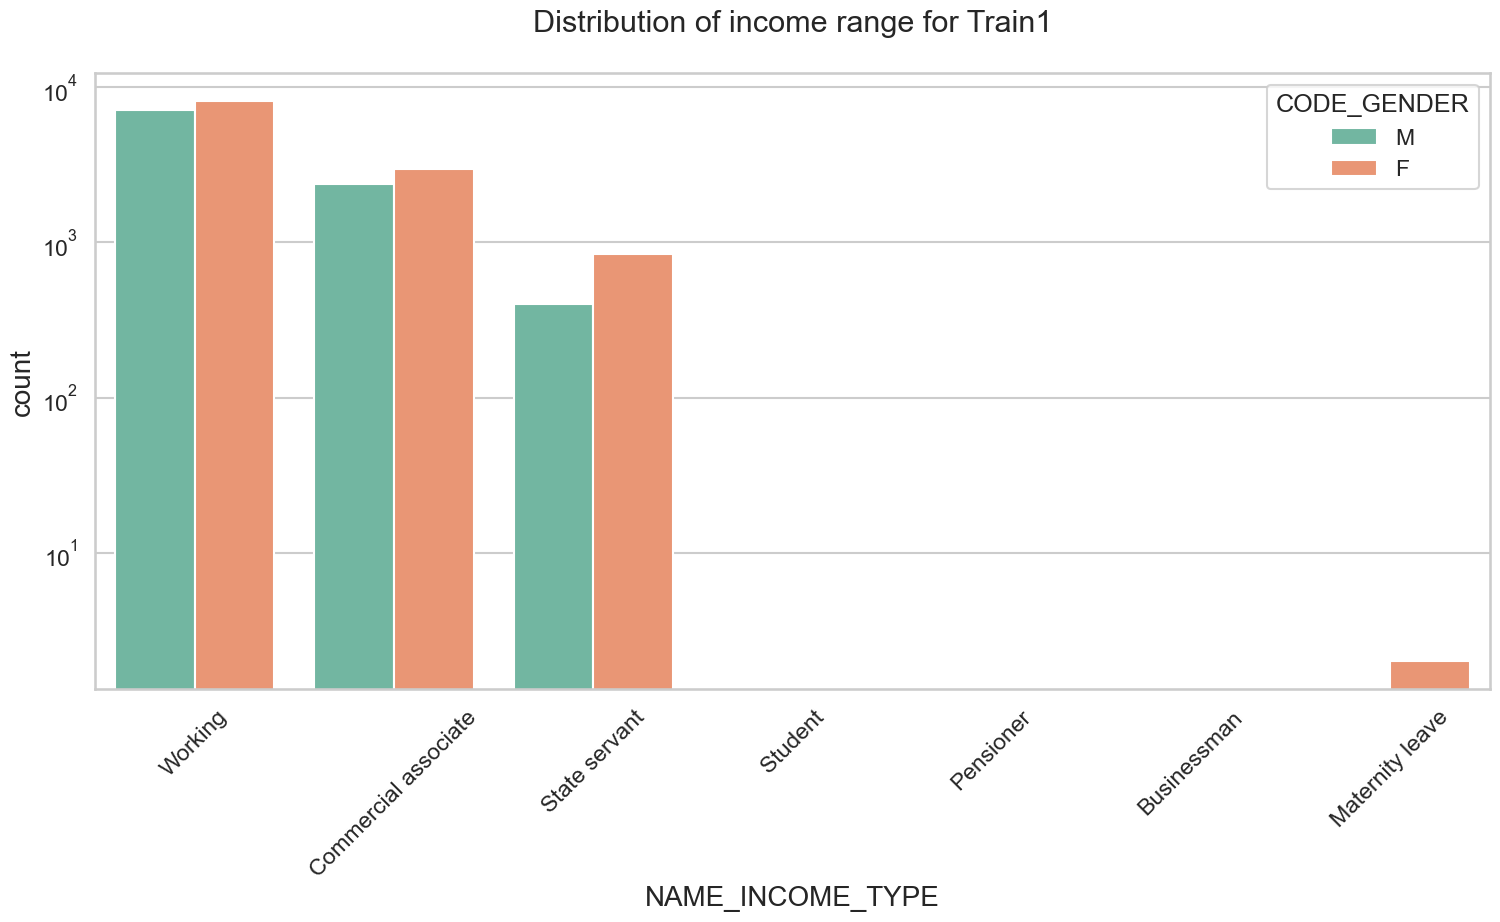

In [261]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

temp = pd.Series(data = 'CODE_GENDER')
fig, ax = plt.subplots()
width = len(applicants['NAME_INCOME_TYPE'].unique()) + 7 + 4*len(temp.unique())
fig.set_size_inches(width , 8)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Distribution of income range for Train1")

ax = sns.countplot(data = train_1, x= 'NAME_INCOME_TYPE', order=applicants['NAME_INCOME_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='Set2') 
plt.show()

Observations for the Income Type - 

- For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.
- For train1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t have any late payments.

# Numerical Columns

In [127]:
applicants["TARGET"] = applicants["TARGET"].apply(int)
target_num = applicants[num_col]

In [128]:
# Dividing the dataset into two datasets of  target_1 which is "client with payment difficulties" and target_0 is "all other"

target_0 = target_num.loc[target_num['TARGET'] == 0]
target_1 = target_num.loc[target_num['TARGET'] == 1]

###  Finding the top 10 correlation

## Target_0

In [129]:
target_0.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_QRT
SK_ID_CURR,1.000000,NaN,-0.000484,0.001415,-0.000777,-0.001180,-0.000387,-0.000094,-0.001016,-0.000005,...,0.002260,0.000567,0.001982,0.000340,0.002098,0.000609,0.002239,0.000523,0.003534,0.000186
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000484,NaN,1.000000,-0.009826,-0.018704,-0.007614,-0.022293,-0.030352,0.242462,0.063036,...,-0.022614,0.010874,-0.021613,0.011004,-0.022277,0.019474,0.003481,0.019148,0.002439,-0.000453
AMT_INCOME_TOTAL,0.001415,NaN,-0.009826,1.000000,0.326155,0.400752,0.333292,0.169306,-0.045543,-0.030102,...,0.149522,0.000787,0.143652,0.001366,0.148442,-0.031292,-0.028196,-0.031106,-0.027641,0.016234
AMT_CREDIT,-0.000777,NaN,-0.018704,0.326155,1.000000,0.762103,0.986471,0.103876,-0.152659,-0.087500,...,0.088526,-0.003337,0.086177,-0.002804,0.088131,-0.002932,-0.021726,-0.002902,-0.023820,0.022967
AMT_ANNUITY,-0.001180,NaN,-0.007614,0.400752,0.762103,1.000000,0.766655,0.122210,-0.091571,-0.052469,...,0.109847,0.002460,0.106695,0.002556,0.109070,-0.015591,-0.022805,-0.015410,-0.023705,0.014217
AMT_GOODS_PRICE,-0.000387,NaN,-0.022293,0.333292,0.986471,0.766655,1.000000,0.107024,-0.146854,-0.088614,...,0.093637,-0.003174,0.091184,-0.002576,0.093186,-0.003335,-0.023078,-0.003347,-0.024749,0.023364
REGION_POPULATION_RELATIVE,-0.000094,NaN,-0.030352,0.169306,0.103876,0.122210,0.107024,1.000000,-0.041138,0.008663,...,0.278160,-0.016050,0.263424,-0.015905,0.275037,-0.014604,0.004554,-0.014082,0.000247,-0.002376
DAYS_BIRTH,-0.001016,NaN,0.242462,-0.045543,-0.152659,-0.091571,-0.146854,-0.041138,1.000000,0.352662,...,-0.014074,0.009523,-0.013388,0.009751,-0.013933,0.019419,0.015146,0.019018,0.015835,-0.008802
DAYS_EMPLOYED,-0.000005,NaN,0.063036,-0.030102,-0.087500,-0.052469,-0.088614,0.008663,0.352662,1.000000,...,-0.000445,0.001878,-0.000653,0.001557,-0.000432,-0.000806,0.007403,-0.000866,0.009349,-0.002094


In [130]:
correlation_0 = target_0.corr().abs().unstack().sort_values().dropna()
correlation_0

DAYS_EMPLOYED                SK_ID_CURR                     0.000005
SK_ID_CURR                   DAYS_EMPLOYED                  0.000005
REGION_POPULATION_RELATIVE   SK_ID_CURR                     0.000094
SK_ID_CURR                   REGION_POPULATION_RELATIVE     0.000094
AMT_REQ_CREDIT_BUREAU_QRT    SK_ID_CURR                     0.000186
                                                              ...   
FLOORSMAX_MEDI               FLOORSMAX_MEDI                 1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       1.000000
DEF_30_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       1.000000
LIVE_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    1.000000
AMT_REQ_CREDIT_BUREAU_QRT    AMT_REQ_CREDIT_BUREAU_QRT      1.000000
Length: 961, dtype: float64

In [131]:
correlation_0 = correlation_0[ correlation_0 != 1.0 ]
print(correlation_0)

DAYS_EMPLOYED                SK_ID_CURR                      0.000005
SK_ID_CURR                   DAYS_EMPLOYED                   0.000005
REGION_POPULATION_RELATIVE   SK_ID_CURR                      0.000094
SK_ID_CURR                   REGION_POPULATION_RELATIVE      0.000094
AMT_REQ_CREDIT_BUREAU_QRT    SK_ID_CURR                      0.000186
                                                               ...   
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI    0.993145
FLOORSMAX_MEDI               FLOORSMAX_AVG                   0.997301
FLOORSMAX_AVG                FLOORSMAX_MEDI                  0.997301
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE        0.998492
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE        0.998492
Length: 930, dtype: float64


#### Top Correlations

## Target_1 = Defaulter correlation

In [132]:
correlation_1 = target_1.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind="quicksort")
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0]

print(correlation_1)

DAYS_EMPLOYED                 AMT_INCOME_TOTAL               0.000039
AMT_INCOME_TOTAL              DAYS_EMPLOYED                  0.000039
DAYS_EMPLOYED                 HOUR_APPR_PROCESS_START        0.000092
HOUR_APPR_PROCESS_START       DAYS_EMPLOYED                  0.000092
DAYS_EMPLOYED                 DEF_60_CNT_SOCIAL_CIRCLE       0.000188
                                                               ...   
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG    0.995947
FLOORSMAX_AVG                 FLOORSMAX_MEDI                 0.997516
FLOORSMAX_MEDI                FLOORSMAX_AVG                  0.997516
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE       0.998289
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE       0.998289
Length: 930, dtype: float64


In [133]:
correlation_1.sort_values(ascending = False).head(20)

OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998289
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998289
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997516
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997516
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.995947
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.995947
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989049
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989049
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986911
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986911
AMT_GOODS_PRICE               AMT_CREDIT                      0.982464
AMT_CREDIT                    AMT_GOODS_PRICE                 0.982464
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.981383
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.981383
YEARS_

#### Top Correlations

#### Now, plotting the above correlation with heat map as it is the best choice to visulaize


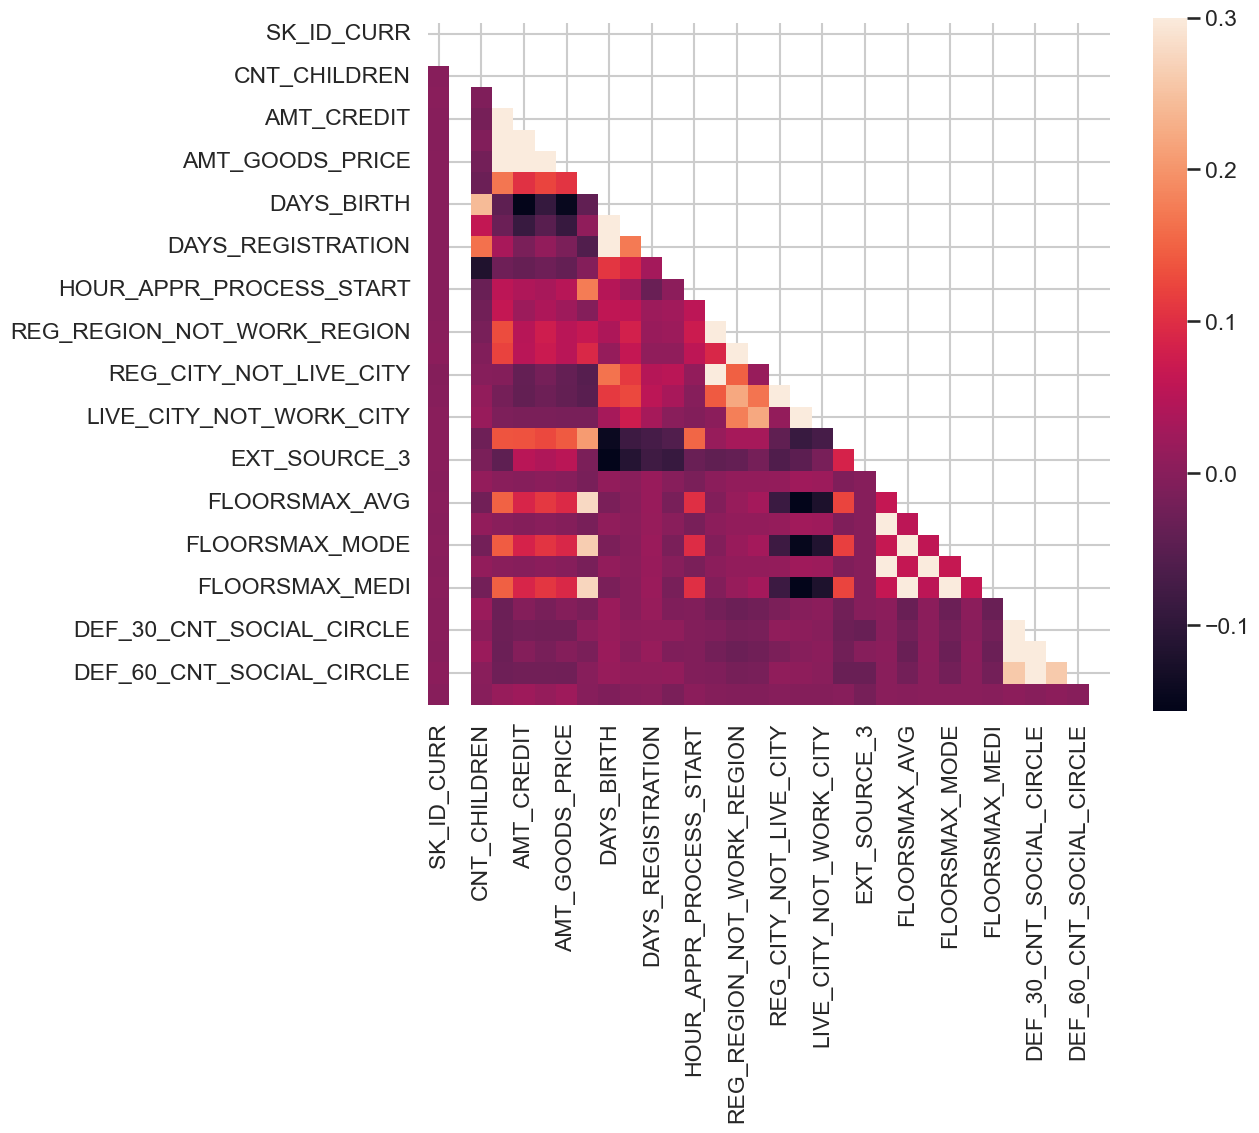

In [135]:
import numpy as np
corr = target_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

As we can see from above correlation heatmap, There are number of observation we can point out

- Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
- Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
- Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
- People have less children in densely populated area.
- Credit and annuity amount is higher in densely populated area.
- The income is also higher in densely populated area.

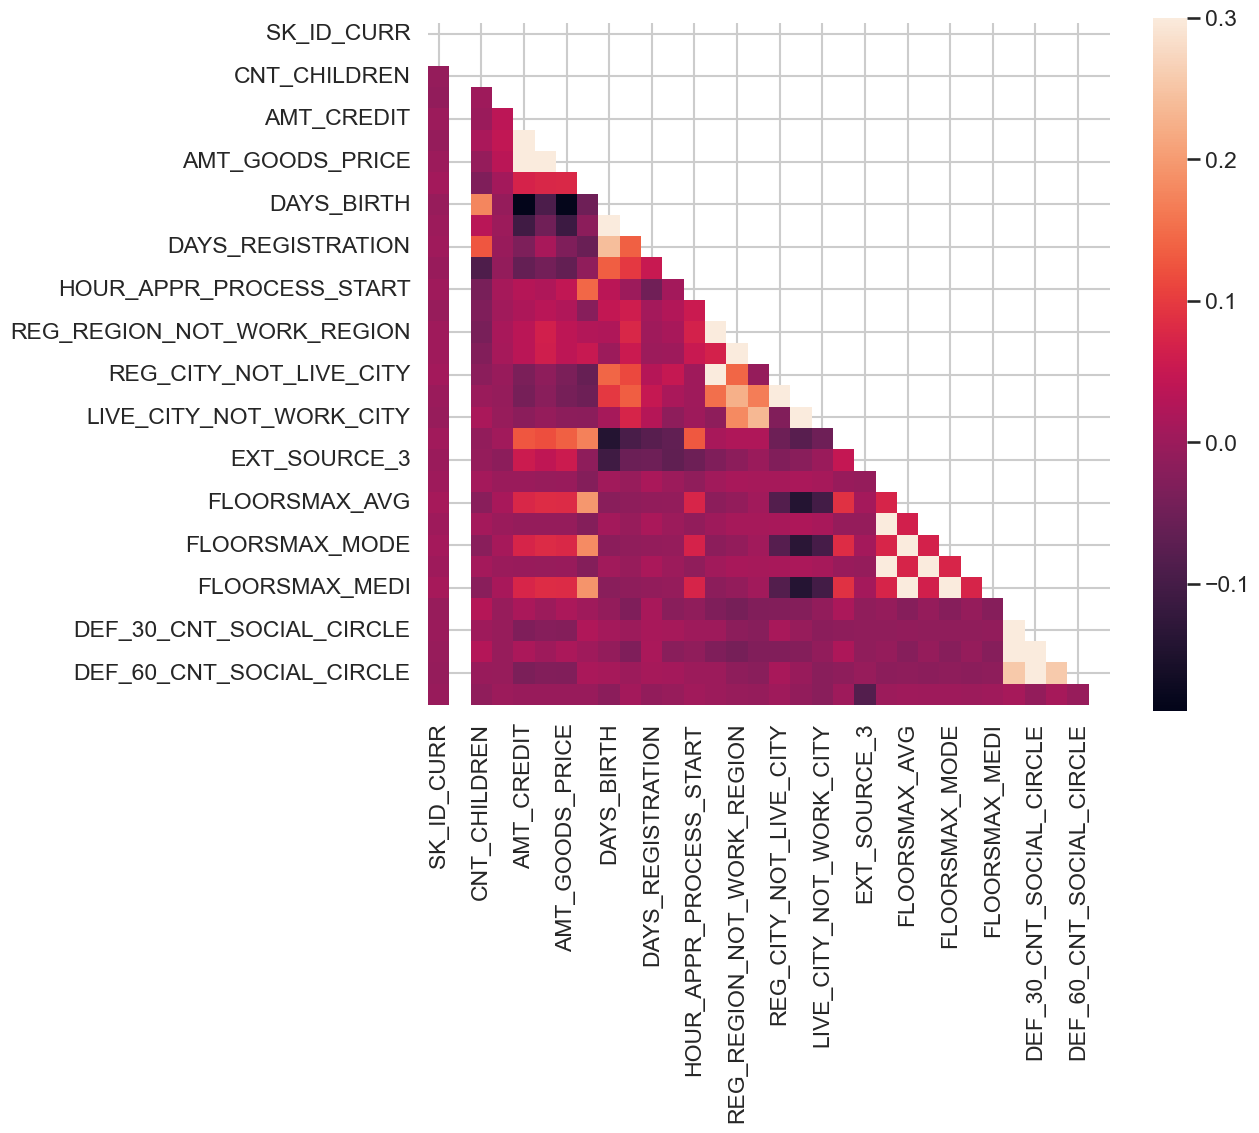

In [136]:
import numpy as np
corr = target_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

This heat map for Target 1 is quite similar to Target 0 but with few differences.

- People with permanent address have a inverse proportion with contact address are having less children.
- People with permanent address have a inverse proportion work address are having less children.

## Analysis for the outliers

Plotting the numerial data based on the index and analysing if there are outliers in any of the column. 

#### For Target 0 - Finding any outliers


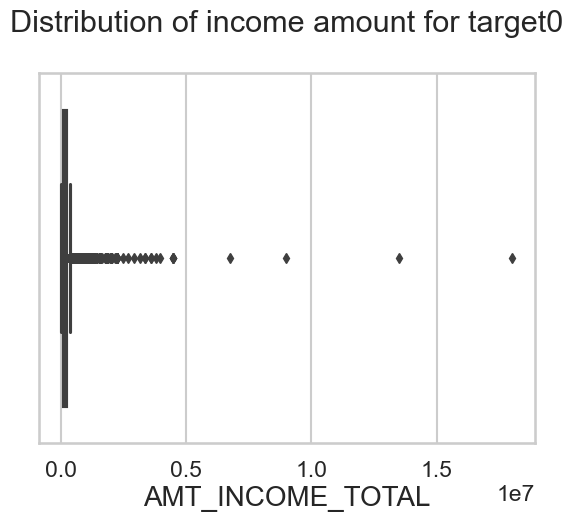

In [175]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of income amount for target0")

sns.boxplot(data =target_0, x='AMT_INCOME_TOTAL',orient='v')
plt.show()

Income Total Box plot analysis- 

- Some outliers are noticed in income amount.- 
The third quartile is very slim for income amount..

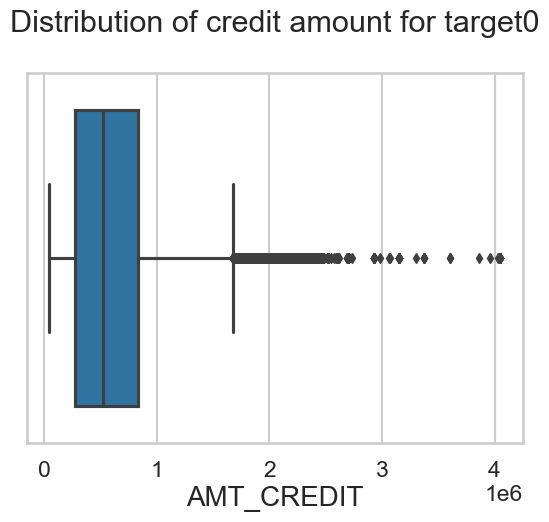

In [176]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of credit amount for target0")

sns.boxplot(data =target_0, x='AMT_CREDIT',orient='v')
plt.show()

Credit Amount Box plot analysis- 

- Some outliers are noticed in credit amount.
- The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

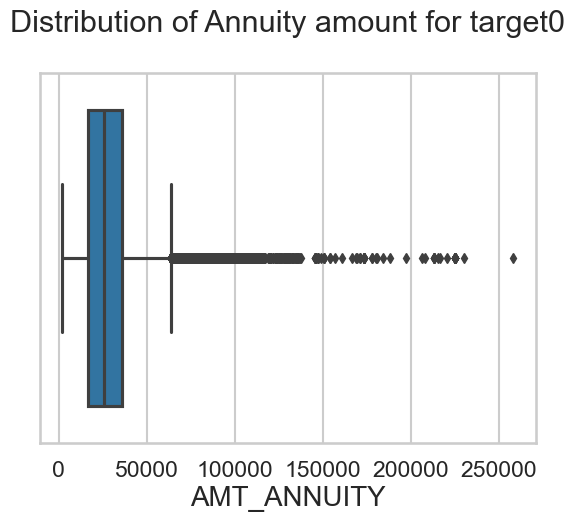

In [178]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Annuity amount for target0")

sns.boxplot(data =target_0, x='AMT_ANNUITY',orient='v')
plt.show()

Annuity Amount Box plot analysis- 

- Some outliers are noticed in annuity amount.
- The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

#### For Target 1 - Finding any outliers


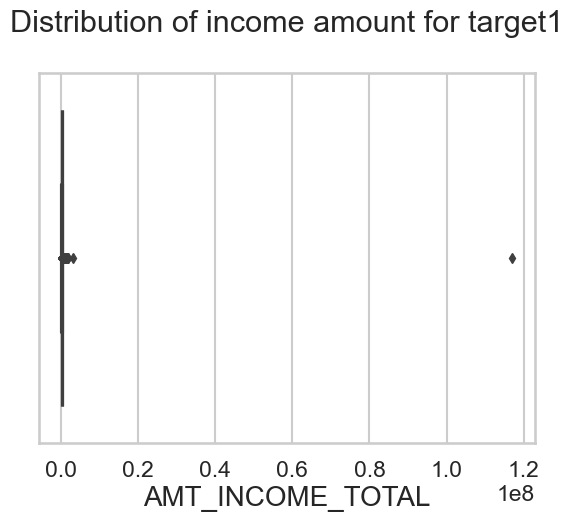

In [257]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of income amount for target1")

sns.boxplot(data =target_1, x='AMT_INCOME_TOTAL',orient='v')
plt.show()

Income Total Box plot analysis- 

- Some outliers are noticed in income amount.
- The third quartile is very slim for income amount.
- Most of the clients of income are present in first quartile.

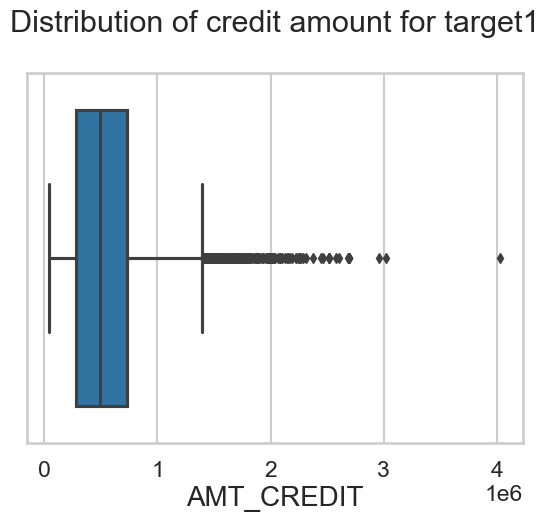

In [258]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of credit amount for target1")

sns.boxplot(data =target_1, x='AMT_CREDIT',orient='v')
plt.show()

Credit Amount Box plot analysis- 

- Some outliers are noticed in credit amount.
- The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

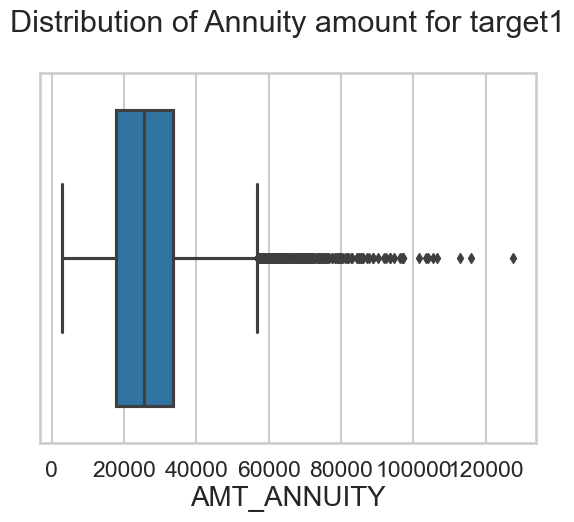

In [259]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Annuity amount for target1")

sns.boxplot(data =target_1, x='AMT_ANNUITY',orient='v')
plt.show()

Annuity Amount Box plot analysis-

- Some outliers are noticed in annuity amount.
- The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile

## Bivariate analysis for numerical variables


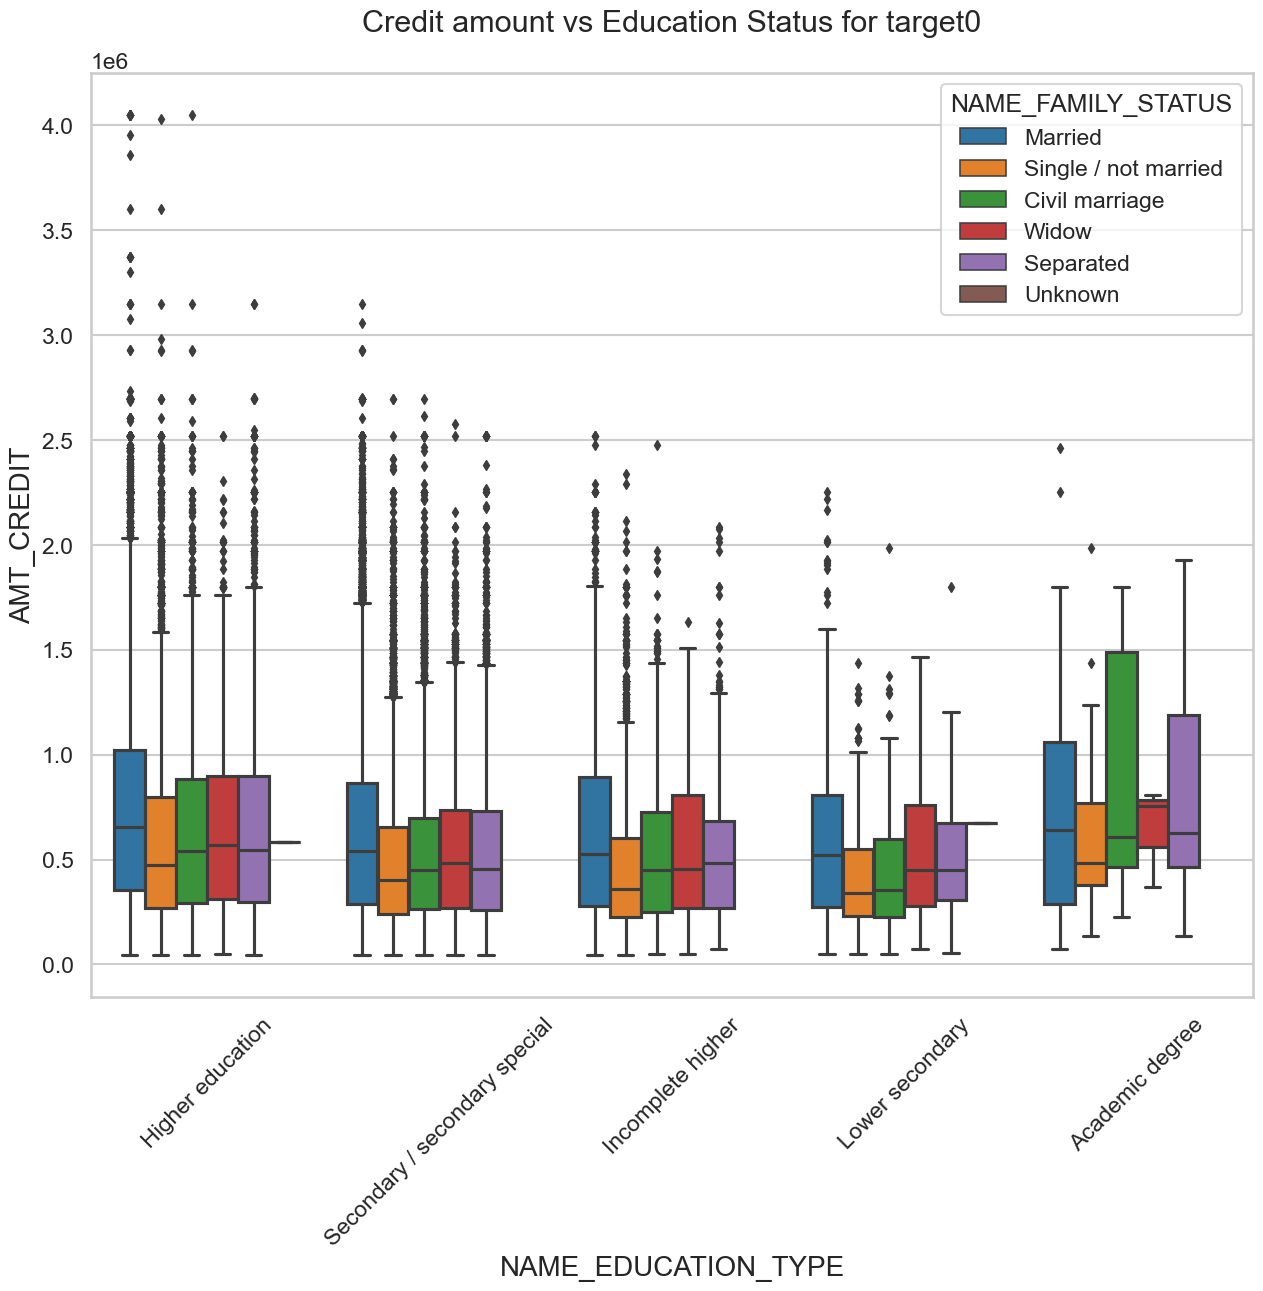

In [188]:
# Box plotting for Credit amount

plt.figure(figsize=(15,12))
plt.xticks(rotation=45)
sns.boxplot(data =train_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for target0')
plt.show()

From the above box plot we can analyse for Train_0 - 
- People with Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. 
- Higher education of people with family status of 'marriage', 'single' and 'civil marriage' has more outliers. 
- Civil marriage for Academic degree is having most of the credits in the third quartile.

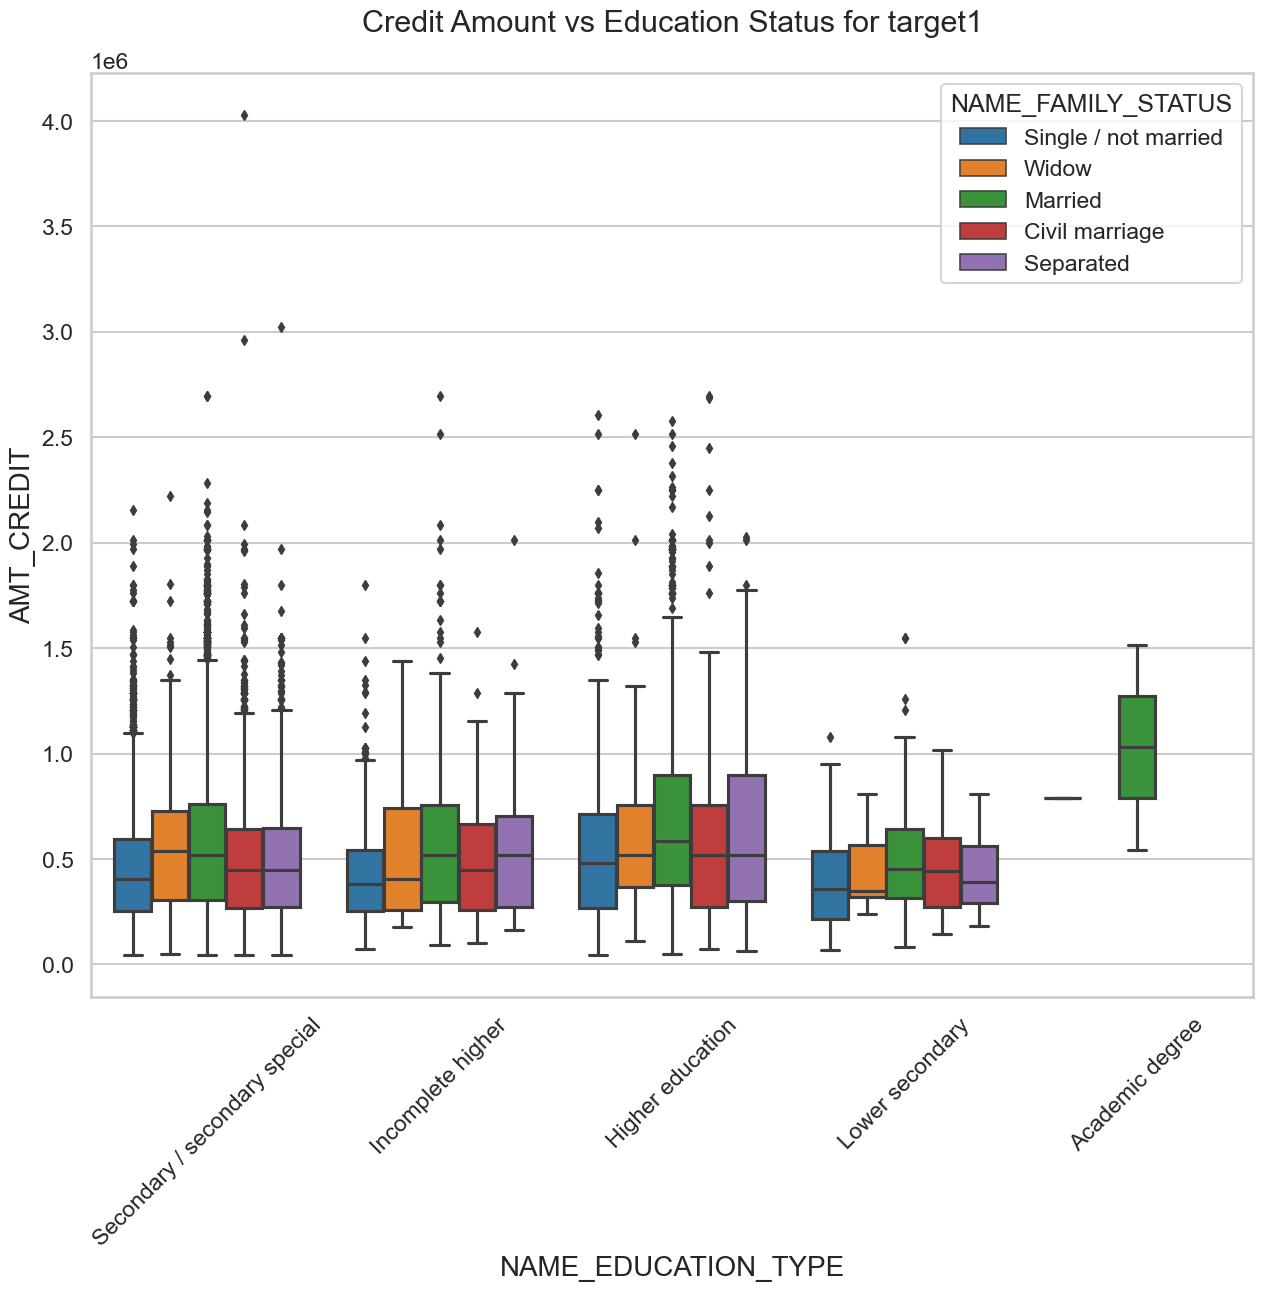

In [189]:
# Box plotting for credit amount

plt.figure(figsize=(15,12))
plt.xticks(rotation=45)
sns.boxplot(data =train_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status for target1')
plt.show()

From the above box plot we can analyse for Train_1 - 
- From the above box plot we can say that people with Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'.
- Civil marriage for Academic degree is having most of the credits in the third quartile.

# Previous Application Data 


In [194]:
previous_applicants = pd.read_csv("previous_application (1).csv")
previous_applicants.shape

(1670214, 37)

### Handling the Missing Values 

In [195]:
previous_applicants.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [196]:
# Cleaning the missing data

# listing the columns having more than 30% null value

emptycol1=previous_applicants.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [197]:
# Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
previous_applicants.drop(labels=emptycol1,axis=1,inplace=True)

previous_applicants.shape

(1670214, 22)

In [200]:
# Removing the column values of 'XNA' and 'XAP'

previous_applicants=previous_applicants.drop(previous_applicants[previous_applicants['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_applicants=previous_applicants.drop(previous_applicants[previous_applicants['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_applicants=previous_applicants.drop(previous_applicants[previous_applicants['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

previous_applicants.shape

(69635, 22)

#### There are duplicate 'SK_ID_CURR' as a person could have taken loan multiple times

In [202]:
# Number of unique id in previous application
previous_applicants.SK_ID_PREV.value_counts()

SK_ID_PREV
1784265    1
2555956    1
1042642    1
2758439    1
2354542    1
          ..
1203828    1
2549278    1
1452474    1
2089621    1
2459206    1
Name: count, Length: 69635, dtype: int64

In [203]:
# Number of unique id in previous application
previous_applicants.SK_ID_CURR.value_counts()

SK_ID_CURR
197725    30
265681    30
341936    27
173910    25
371490    24
          ..
222575     1
298367     1
150302     1
399766     1
344933     1
Name: count, Length: 42201, dtype: int64

As you can see above, the shape of previous application is (69635, 22) and length of SK_ID_PREV is also (69635), but length of SK_ID_CURR is (42201), which is less than length of SK_ID_PREV, which tells us that there are duplicate number of SK_ID_PREV

In [209]:
previous_applicants.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE',
       'AMT_APPLICATION', 'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'],
      dtype=object)

## Bivariate Analysis

Categorical and Categorical Variable

'NAME_CONTRACT_TYPE' VS 'NAME_CLIENT_TYPE' VS 'NAME_PORTFOLIO'

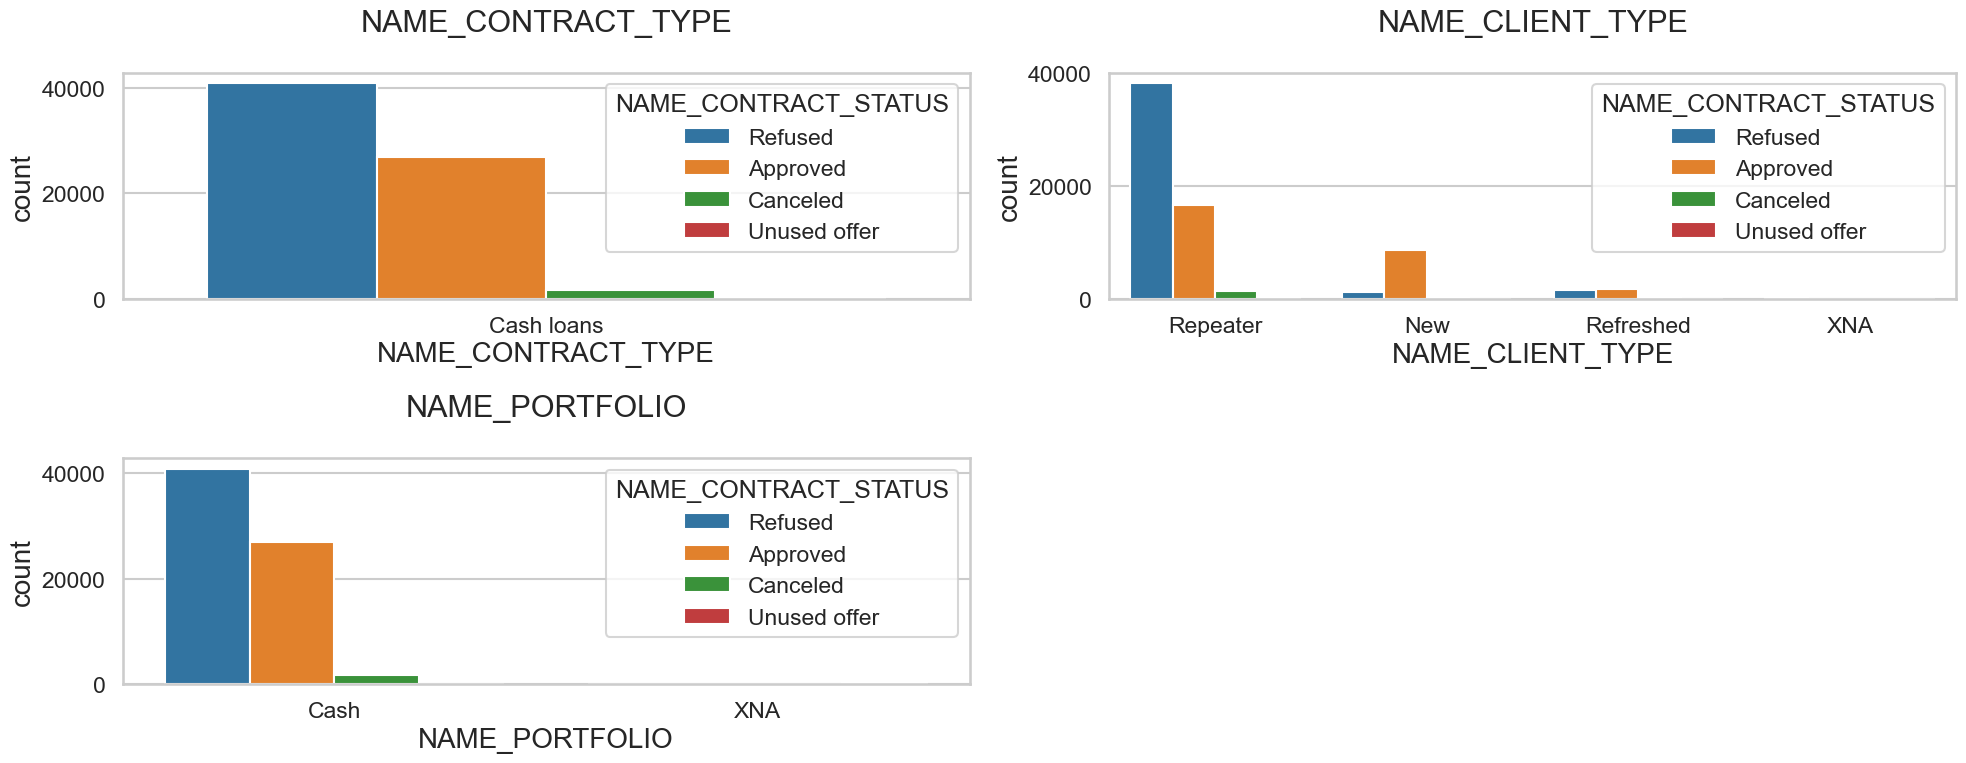

In [232]:
cols=['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']


a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in cols:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=previous_applicants, hue='NAME_CONTRACT_STATUS')
    c = c + 1

fig.tight_layout()
plt.show()

#### Few notable points - 
    
1. In approved category, consumer loan has largest no of applicants. 
2. There seem to be no cancelled loans in cash loan category than consumer loan.
3. More cash loans have been refused than consumer loans.
4. The bank has more repeaters in all approved, refused, unused, cancelled categories
5. POS transactions seem to be consumer loans and similar to point 2 - more cash loans have been refused than POS.

### Multivariate Analysis


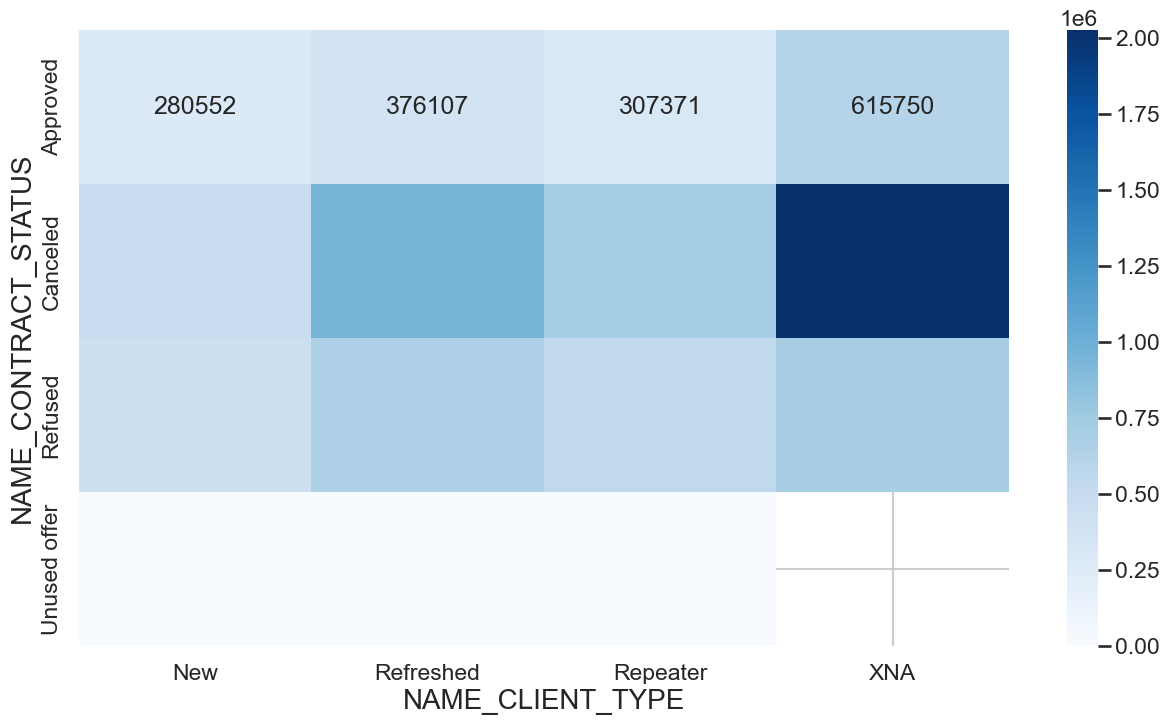

In [237]:
# Checking contract status vs name client type aggregating over application amount

res=pd.pivot_table(data=previous_applicants, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

Few notable points -

1. Unused offer application amount is low
2. Cancelled application amount is high. The bank may be refusing these possibly as the Debt liabiltiy ratio of consumer must be going high due to the high amount and thus credit defualt risk.
3. Repreater's application amount is higeht than the New customers. This may indicate that the bank has more conducive policies/rate of interest etc for repeat applicants

### The merged dataframe also has multiple values for SK_ID_CURR

In [205]:
previous_train = applicants.merge(previous_applicants, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [206]:
previous_train.shape

(51420, 67)

In [210]:
previous_applicants.SK_ID_CURR.value_counts().head()

SK_ID_CURR
197725    30
265681    30
341936    27
173910    25
371490    24
Name: count, dtype: int64

### Segregating the dataset on Target=0 and Target=1

In [211]:
train_0 = applicants.loc[applicants['TARGET'] == 0]
train_1 = applicants.loc[applicants['TARGET'] == 1]

In [212]:
ptrain_0 = previous_train.loc[previous_train['TARGET'] == 0]
ptrain_1 = previous_train.loc[previous_train['TARGET'] == 1]

In [239]:
# Renaming the column names after merging

new_df1 = previous_train.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [241]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

## Plotting data

### Univariate Analysis 

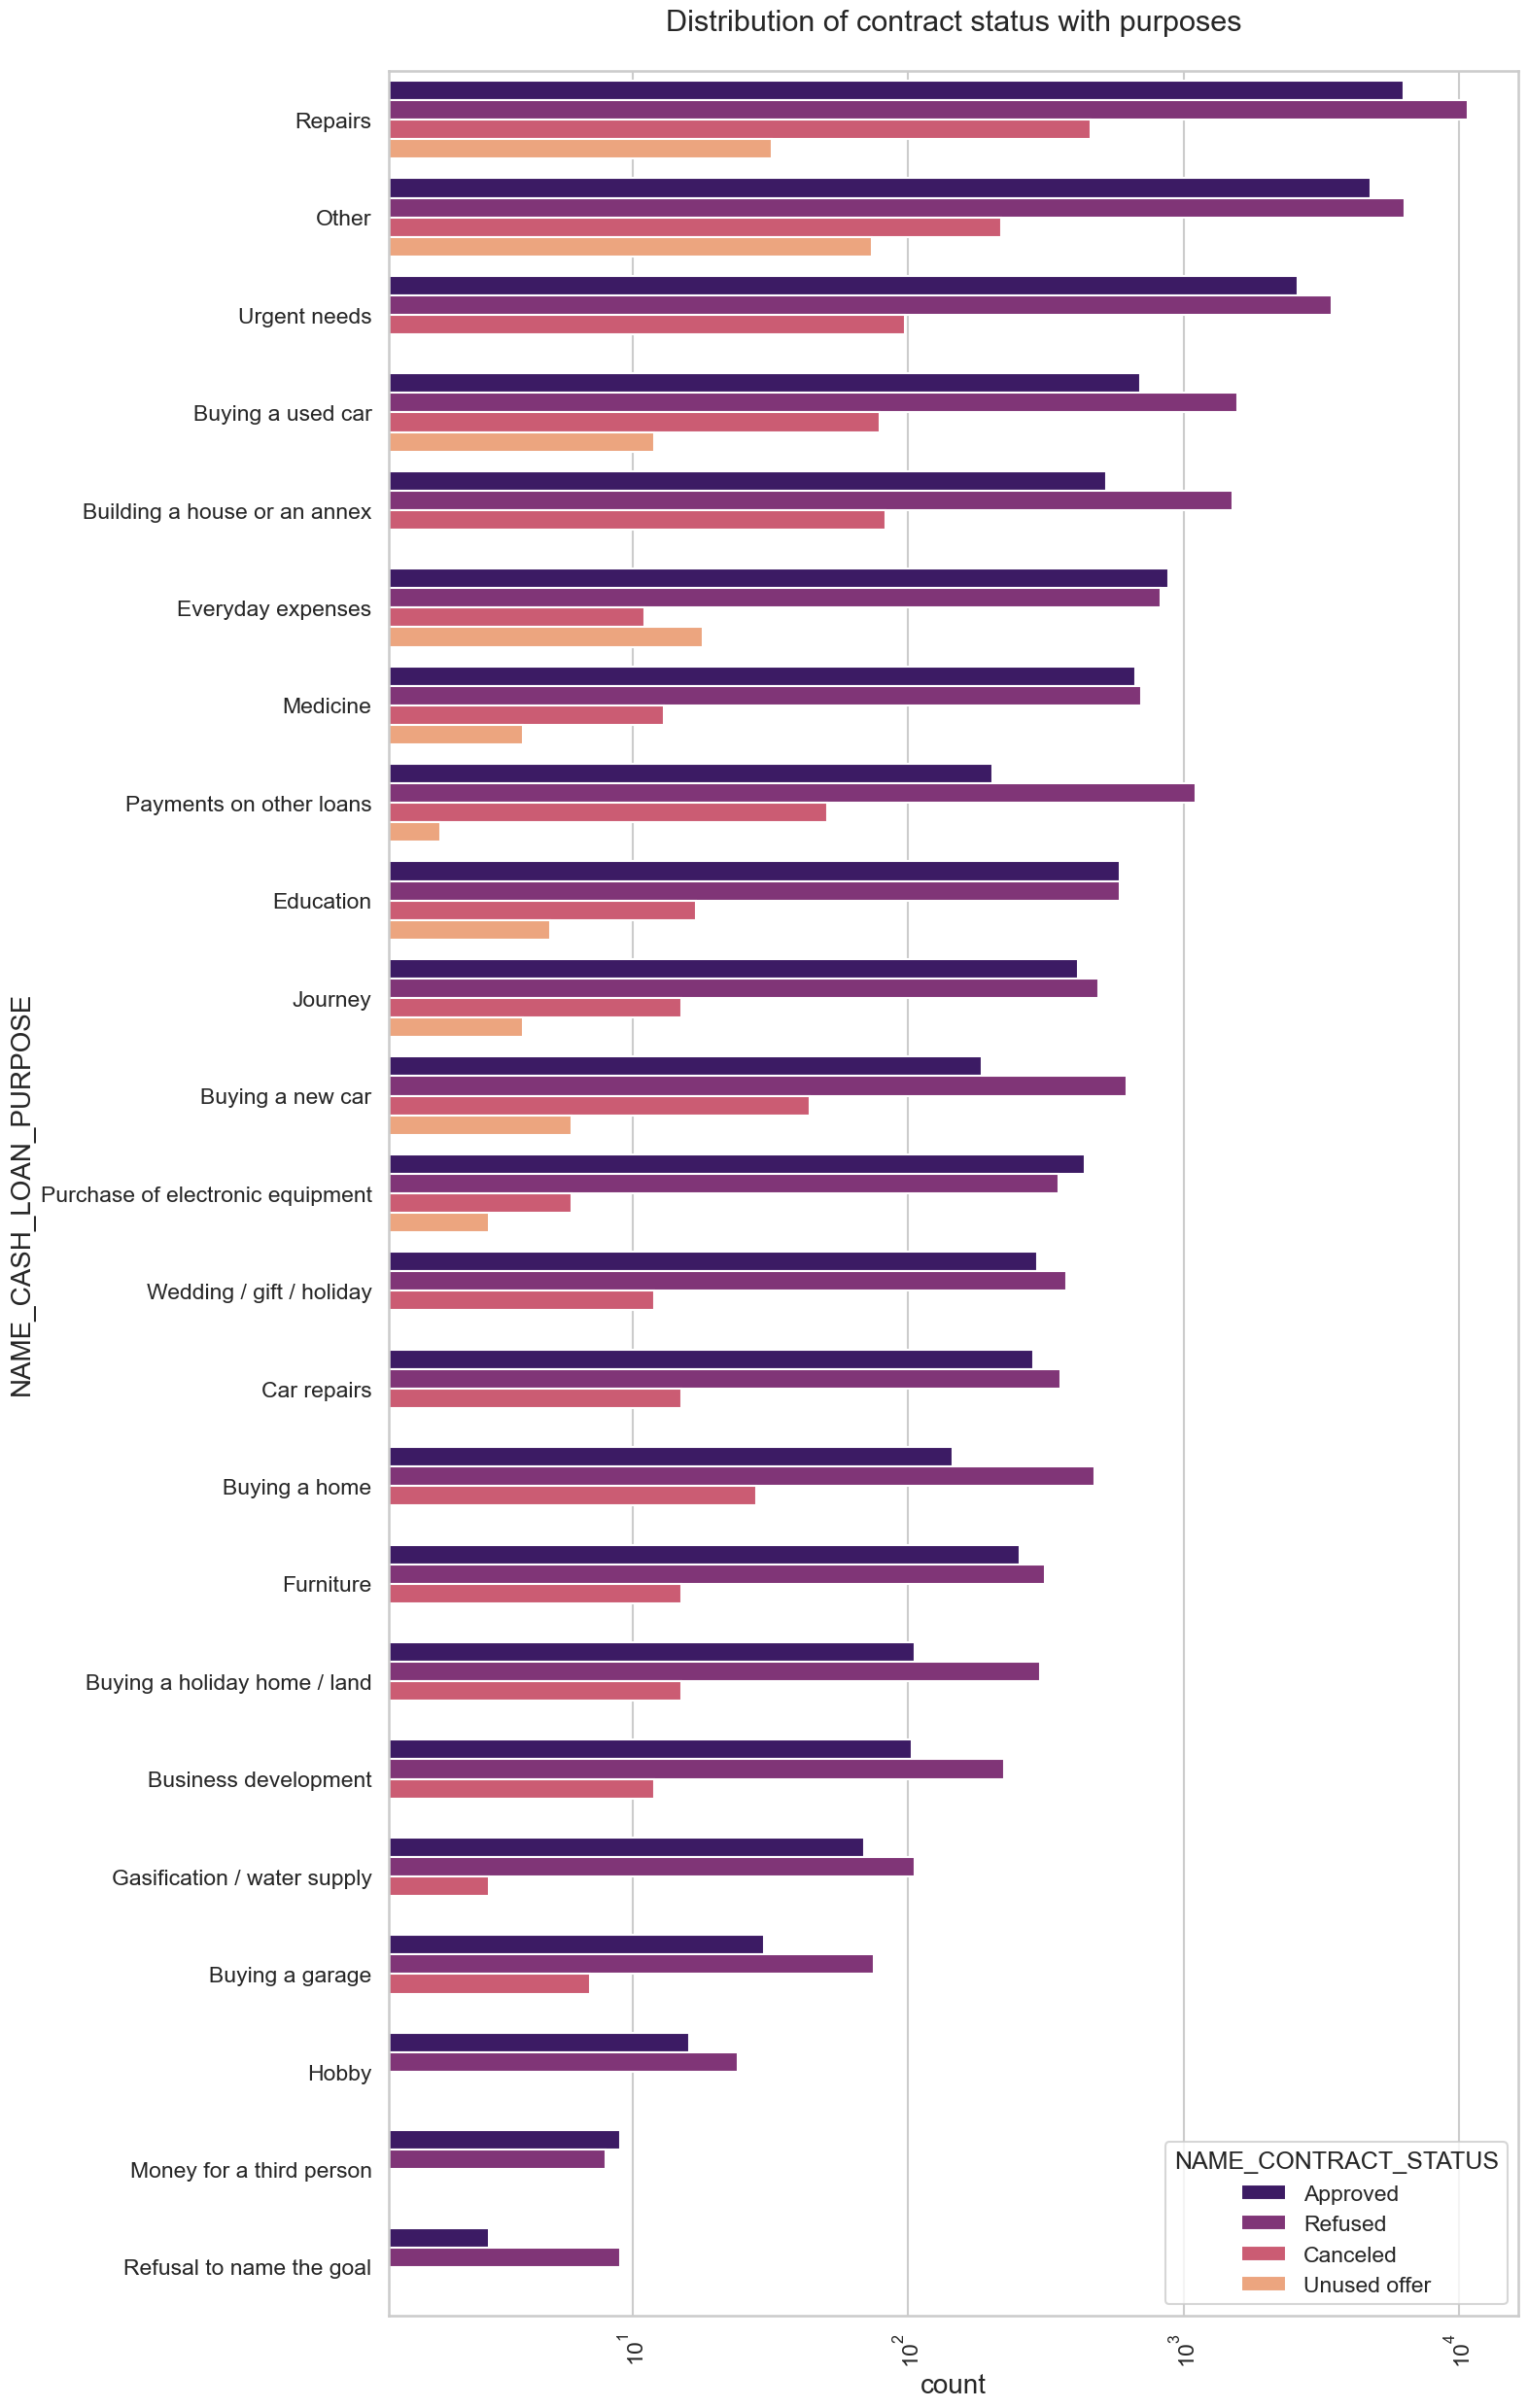

In [242]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

Analysis from the below chart above -

1. Most rejection of loans came from purpose 'repairs'and then 'other'
2. For education purposes we have equal number of approves and rejection.
3. Paying other loans and buying a new car is having significant higher rejection than approves.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

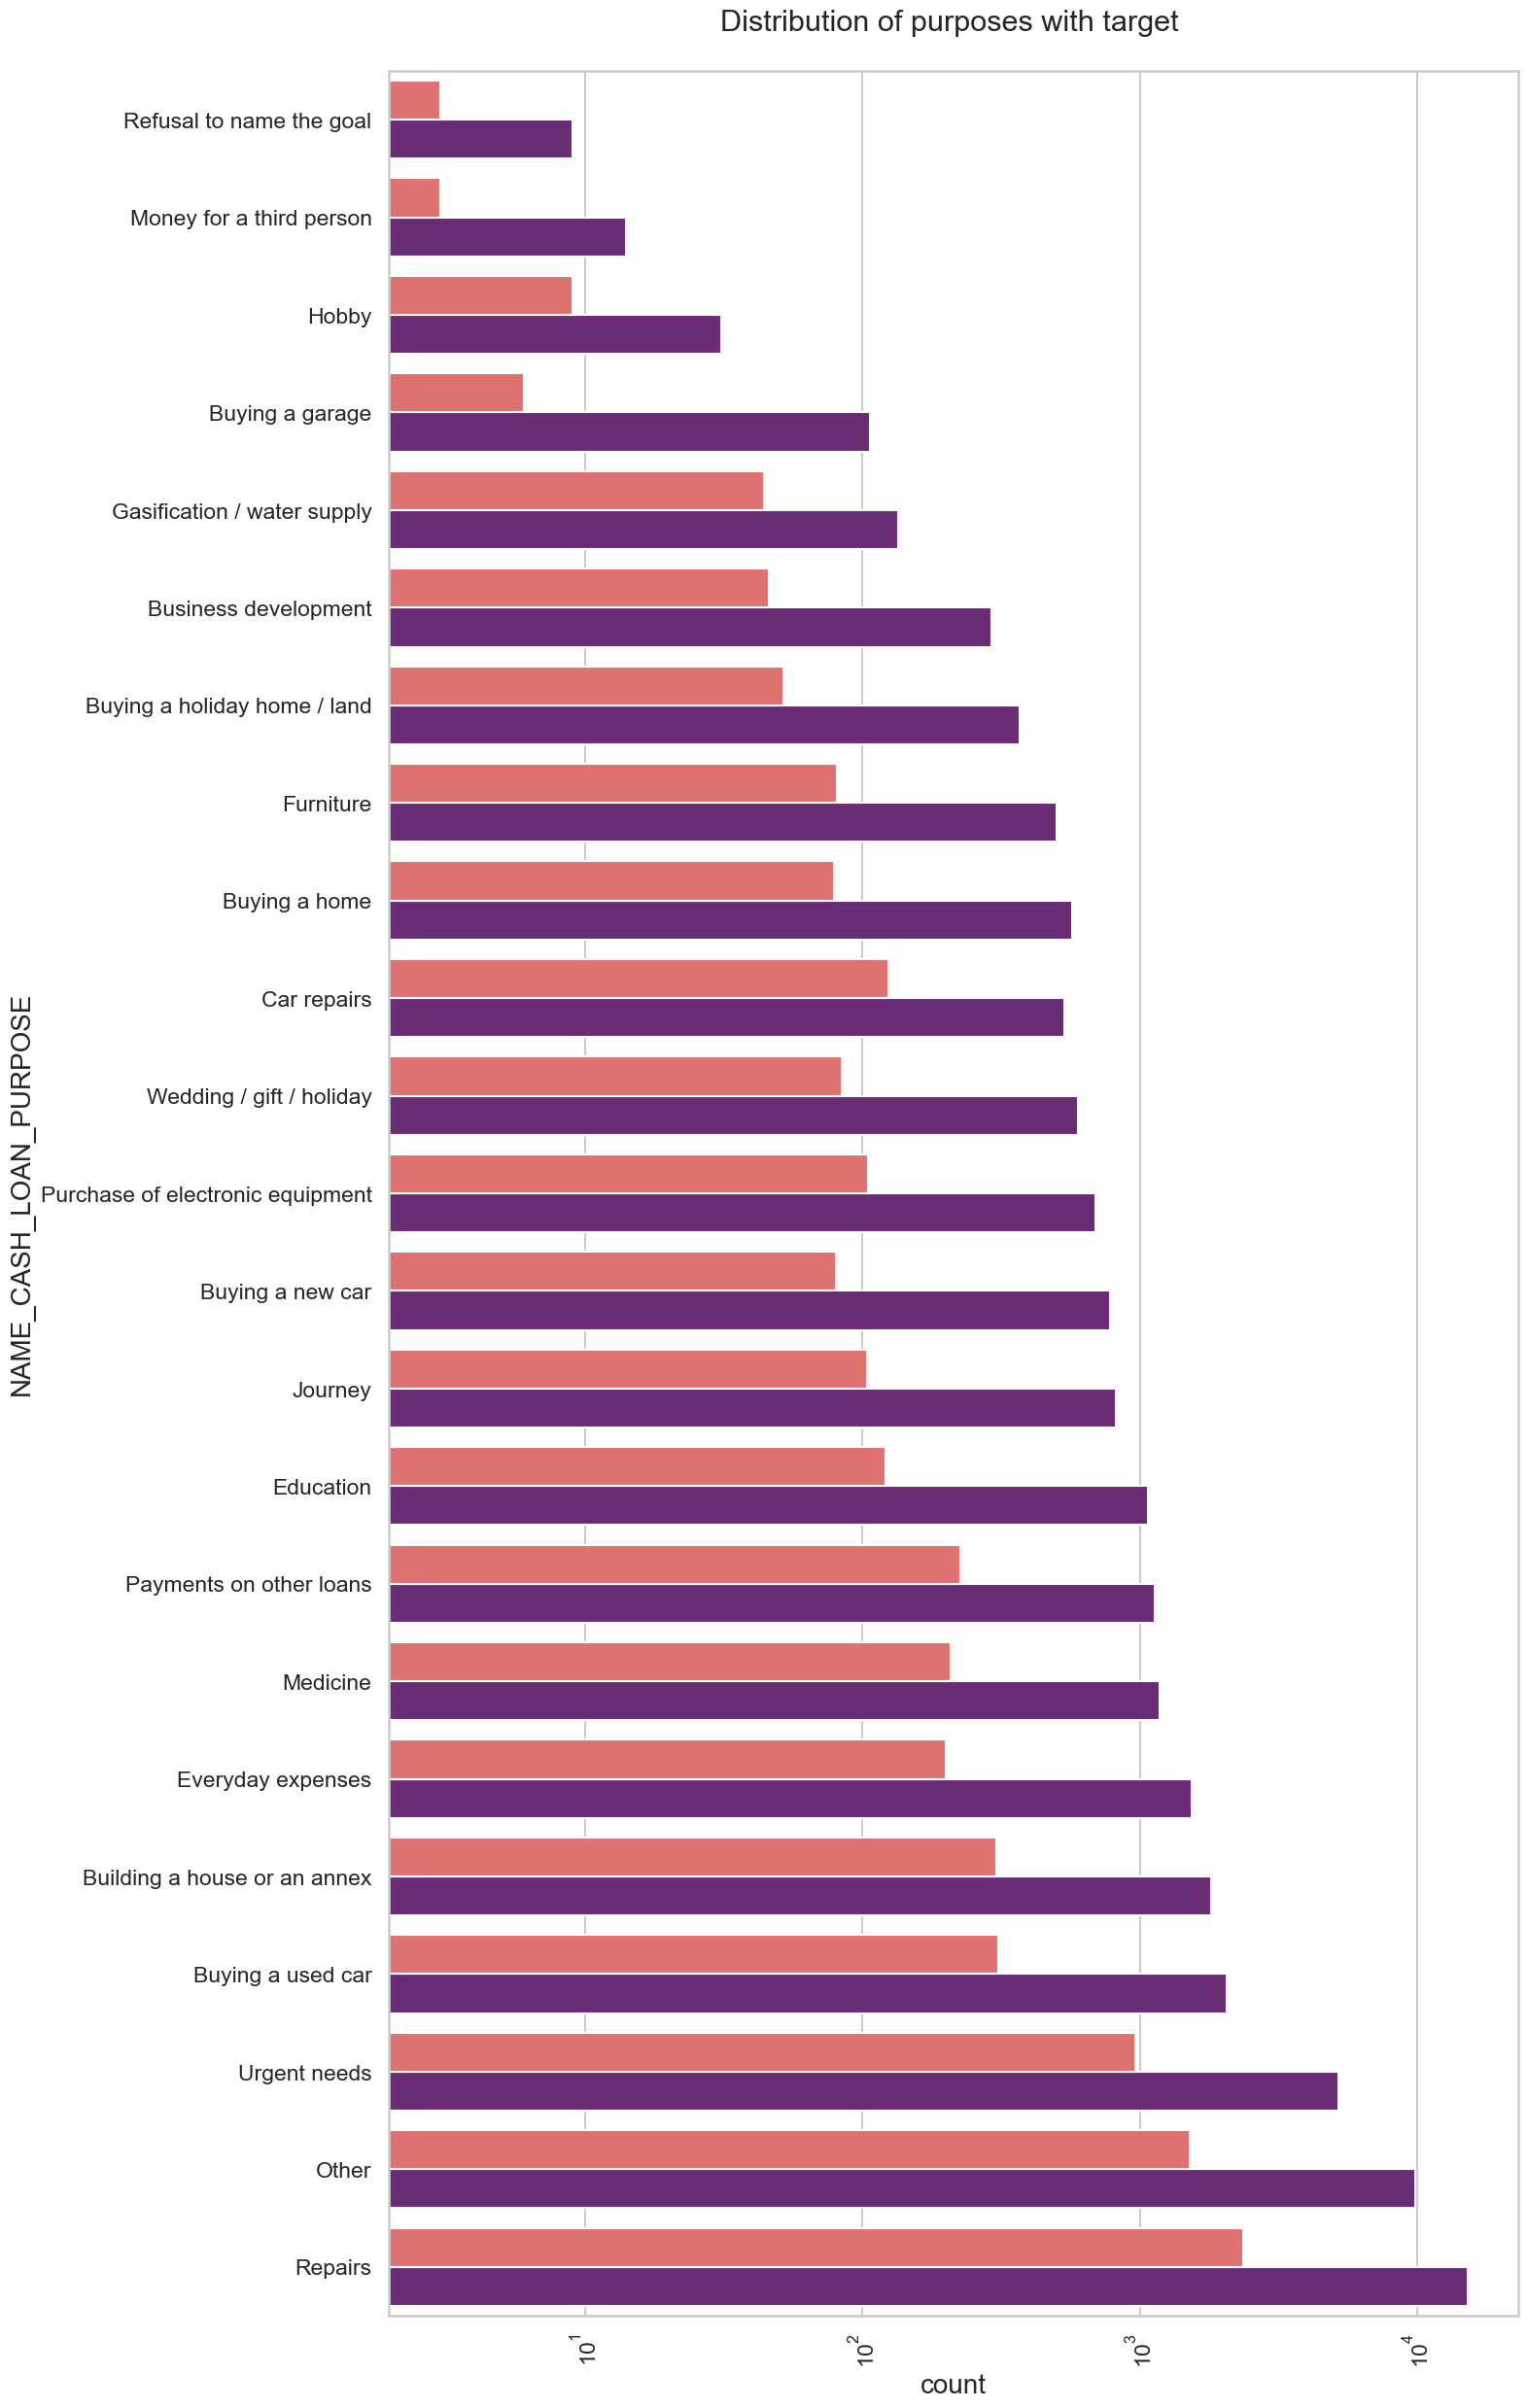

In [260]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

Few points we can conclude from above plot:

- Loan purposes with 'Repairs' are facing most difficulites in payment on time (among all purposes).
- There are few places where loan payment is significantly higher than facing difficulties.
- They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'

Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

In [250]:
new_df1.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


AttributeError: 'numpy.int64' object has no attribute 'startswith'

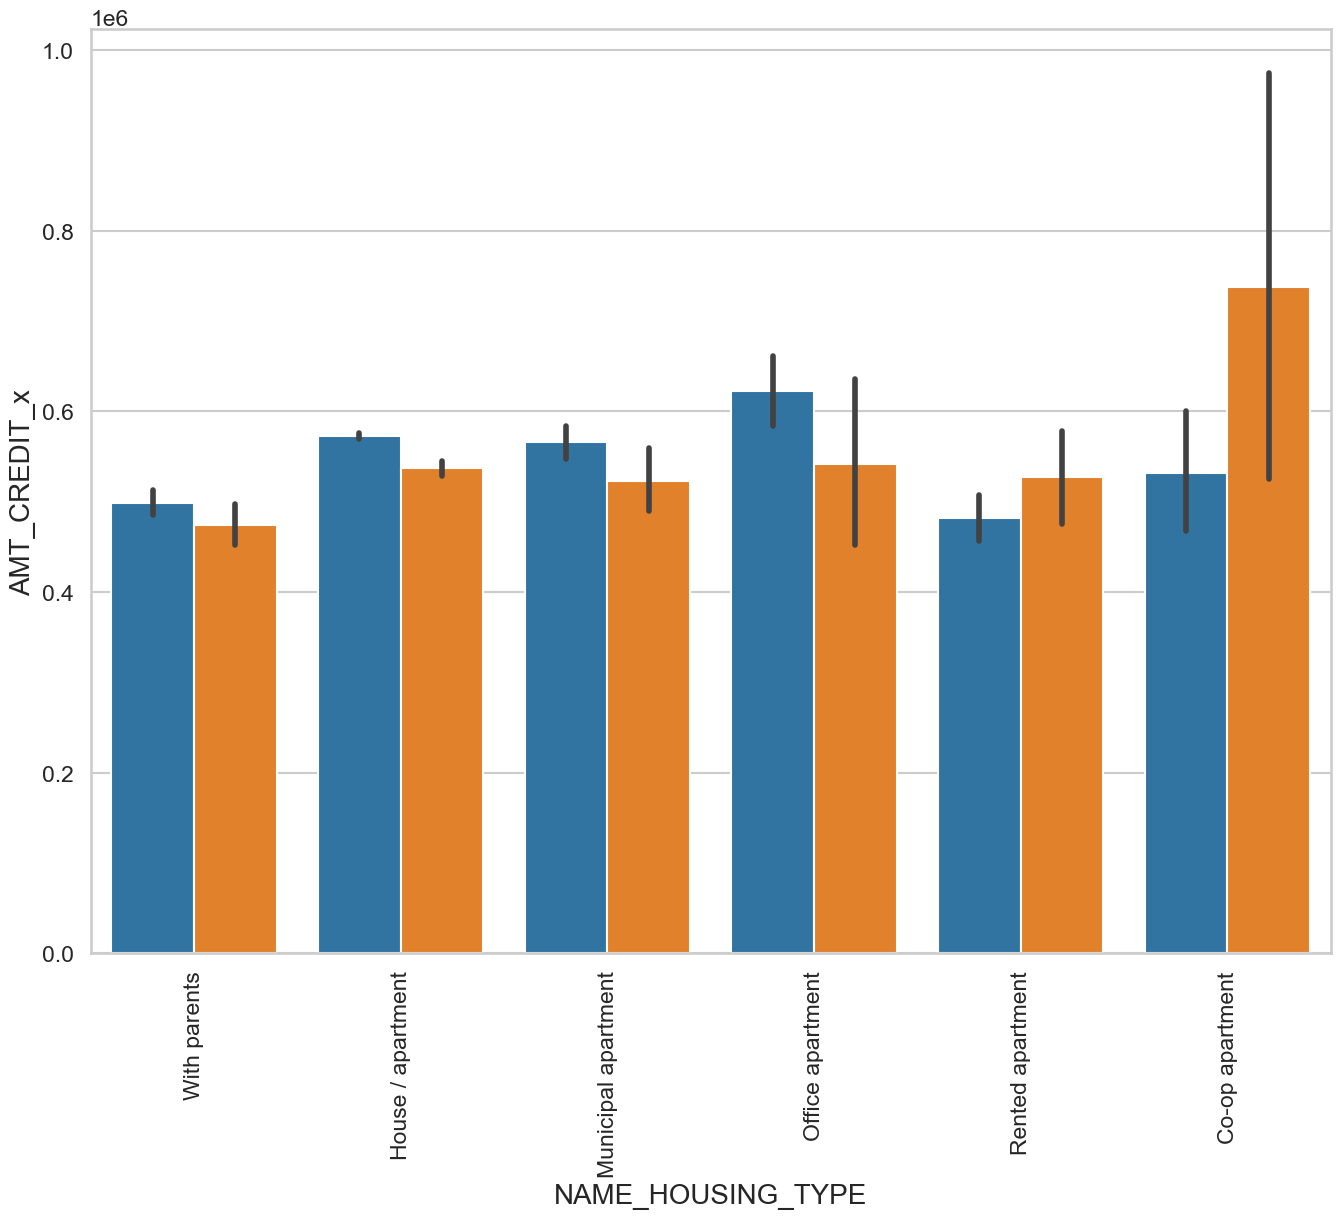

In [255]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data = previous_train, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office apartment is having higher credit for target = 0 and co-op apartment is having higher credit for target = 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.

Bank can focus mostly on housing type with parents or House/apartment or municipal apartment for successful payments.

# Final Summary for the Case study - 

#### Defaulters Characteristics - 

All the below variables were established in analysis of Application dataframe as leading to default - 

- Medium income group can lead for Defaulters.
- 25-35 years age range can lead for Defaulters and there is a slight chance the 35-45 years age group can also become lead for Defaulters.
- We have noticed the Male and mostly in the category of Defaulters.
- People with housing type ‘With parents’ can be targeted as they are having least number of unsuccessful payments.
- Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
- People like Labourers, Salesman, Drivers also led to become Defaulters.
- People with Business type and non Own House can also become Defaulters.
- Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

#### Other IMPORTANT Factors to be considered - 

- Days last phone number changed - Lower figure points at concern
- No of Bureau Hits in last week. Month etc – zero hits is good
- Amount income not correspondingly equivalent to Good Bought – Income low and good value high is a concern
- Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern.
- Focus shall be on people with income type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing type other than ‘Co-op apartment’ for successful payments.
    
This indicates that the financial company had Refused/Cancelled previous application but has approved the current and is facing default on those approvals. 
    
#### Credible Applications refused 

- Unused applications have lower loan amount. Is this the reason for no usage?
- Female applicants should be given extra weightage as defaults are lesser.
- 60% of defaulters are Working applicants. This does not mean working applicants must be refused. Proper scrutiny of other parameters needed
- Previous applications with Refused, Cancelled,Unused loans also have cases where payments are coming on time in current application. This indicates that possibly wrong decisions were done in those cases.done in those cases.
